<a href="https://colab.research.google.com/github/SHermukhammadjon/Atari-Games/blob/main/atari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atrai games


## 0. Installing and impr nessery librarys

In [13]:
# ! pip install stable-baselines3[extra]
# ! pip install -q swig
# ! pip install -q gymnasium[box2d]
!pip install -U colabgymrender

  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3114 sha256=4426f898fbdf3d6f05fee5e6a2801f2eb788123a1c00094f2c99693c251f1dfa
  Stored in directory: /root/.cache/pip/wheels/13/62/63/7b3acfb684dd3d665d7fc1d213427b136205a222389767e295
Successfully built colabgymrender


In [5]:
import gymnasium as gym
from collections import defaultdict

import matplotlib.pyplot  as plt
import matplotlib.patches as patch
import seaborn as sns
import cv2

import numpy as np
import random

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


## 2. CartPole-v1

In [19]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

env.reset()

# Define video writer
width, height = 600, 4006
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_writer = cv2.VideoWriter("test_envorment.mp4", fourcc, 30.0, (width, height))


episodes = 10
for episode in range(1, episodes+1):
    observation = env.reset()
    done = False
    score = 0

    while not done:
        action = random.choice([0, 1])
        observation, reward, done, info, _ = env.step(action)
        score += reward

        # Recording envorment
        frame = env.render()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        frame = cv2.resize(frame, (width, height))

        # Write frame to video
        video_writer.write(frame)


    print(f"Episode {episode} score: {score}")

video_writer.release()
env.close()
cv2.destroyAllWindows()

Episode 1 score: 22.0
Episode 2 score: 41.0
Episode 3 score: 63.0
Episode 4 score: 20.0
Episode 5 score: 13.0
Episode 6 score: 10.0
Episode 7 score: 16.0
Episode 8 score: 11.0
Episode 9 score: 17.0
Episode 10 score: 20.0


In [22]:
import moviepy.editor
moviepy.editor.ipython_display("test_envorment.mp4", width = 300, height = 200)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (60) SSL: no alternative certificate subject name matches target host name 'www.sample-videos.com'
More details here: https://curl.se/docs/sslcerts.html

curl failed to verify the legitimacy of the server and therefore could not
establish a secure connection to it. To learn more about this situation and
how to fix it, please visit the web page mentioned above.


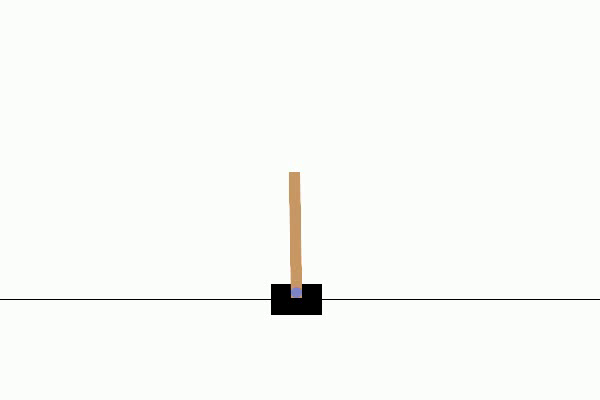

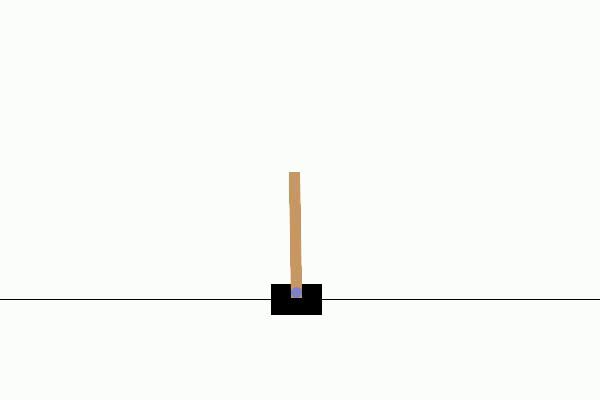

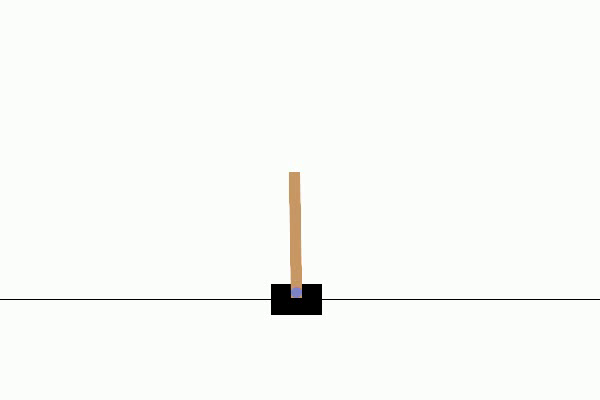

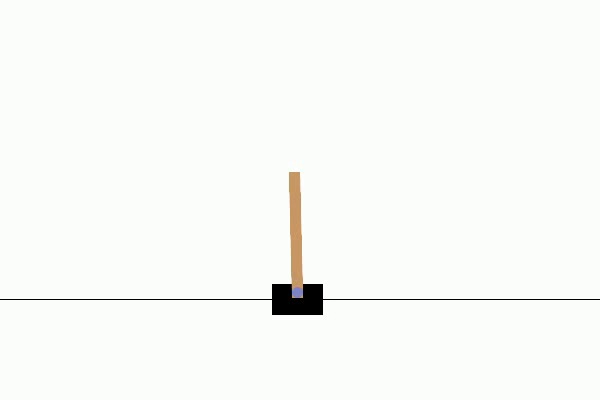

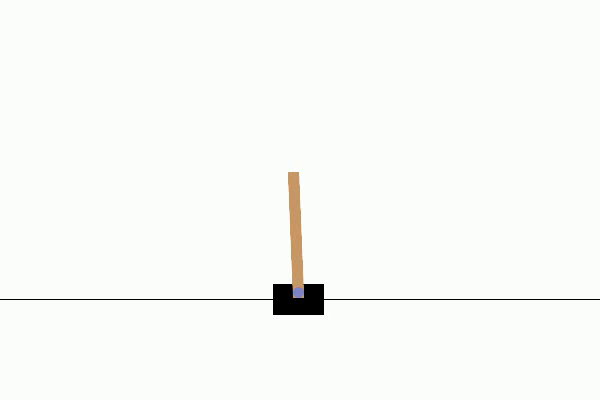

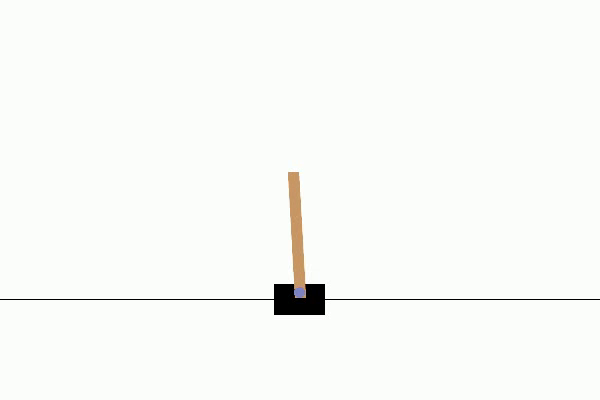

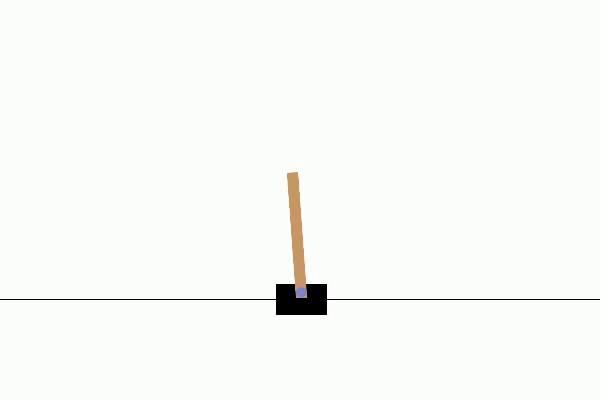

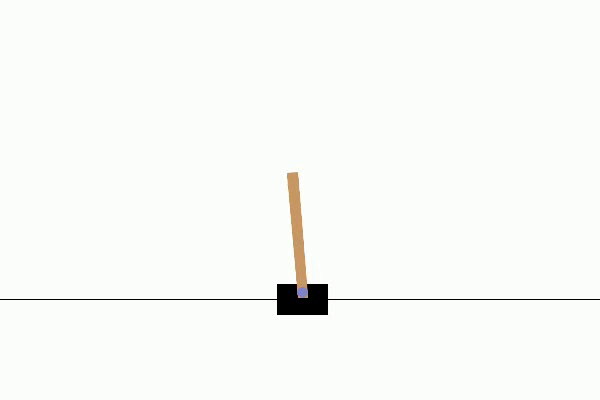

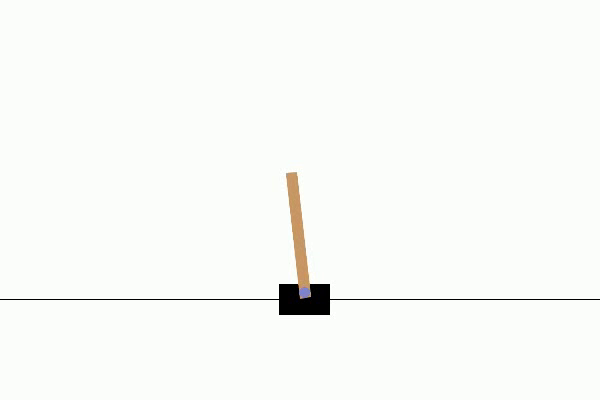

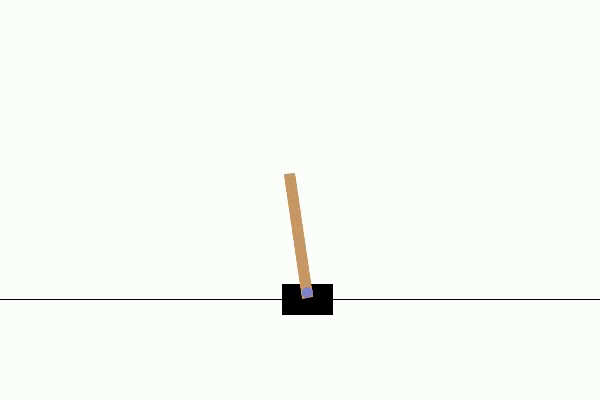

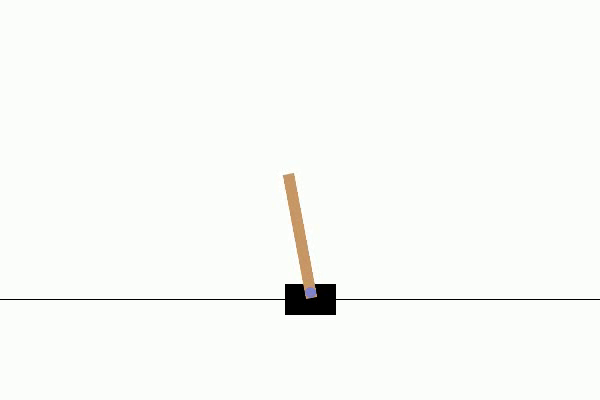

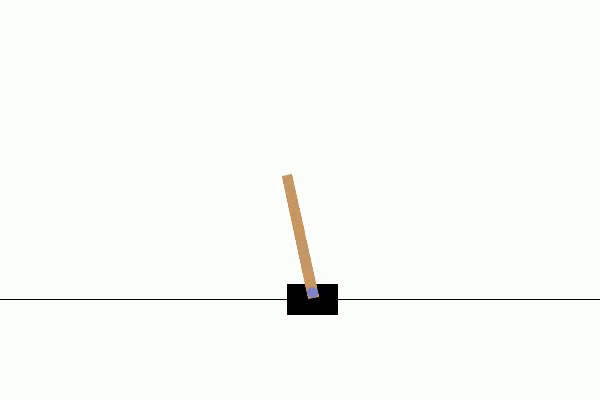

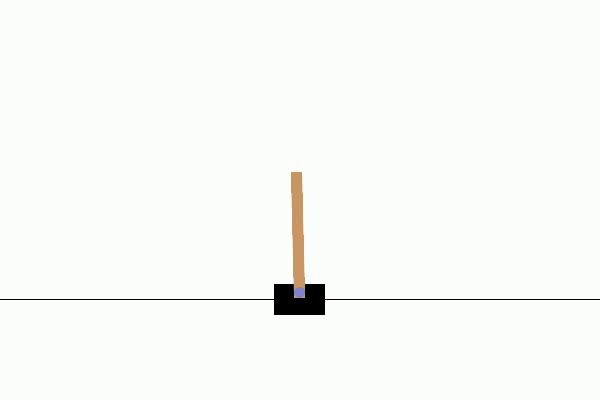

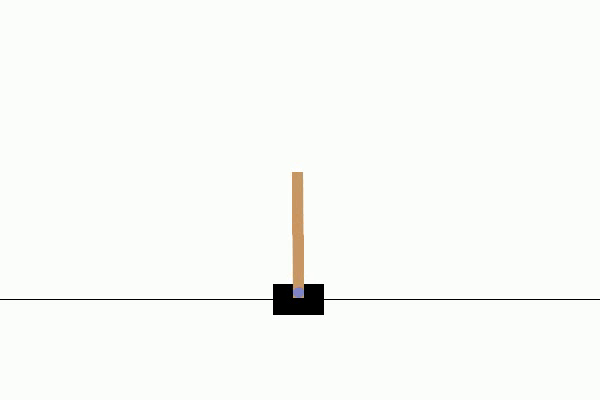

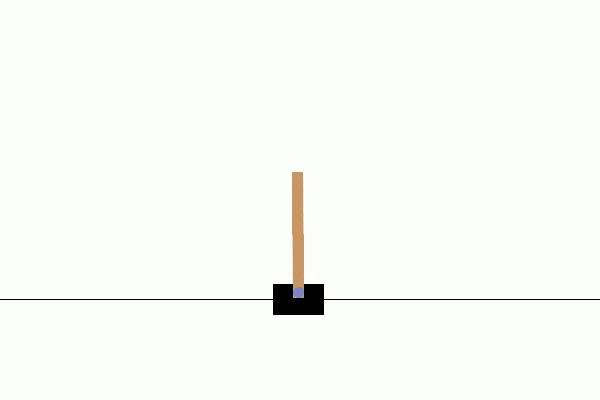

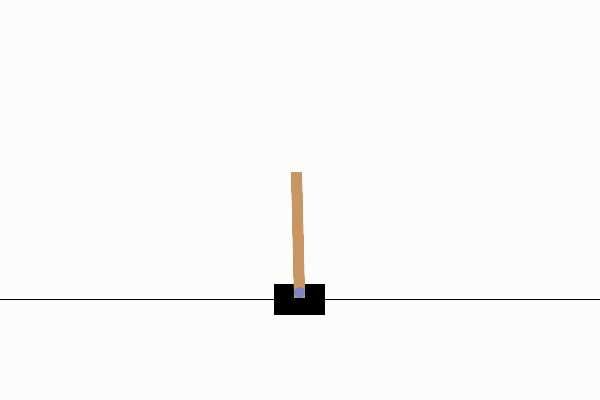

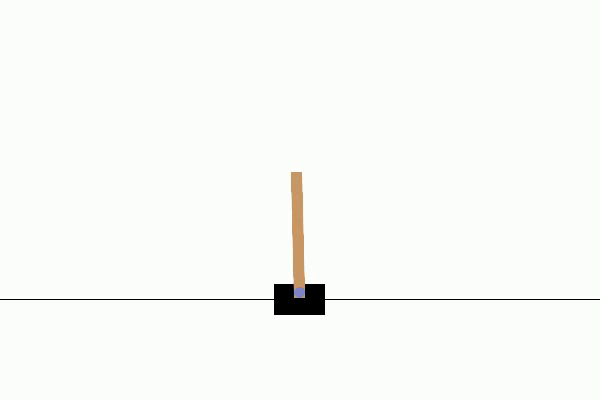

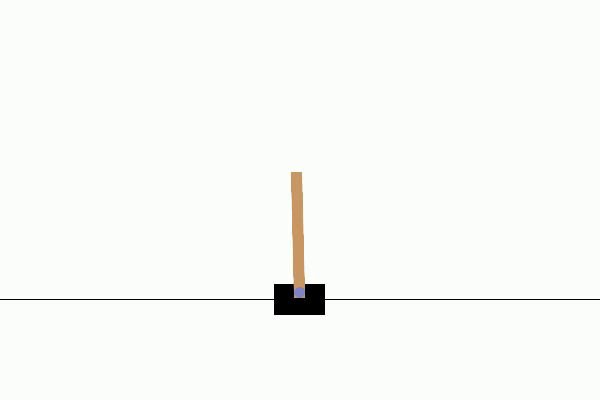

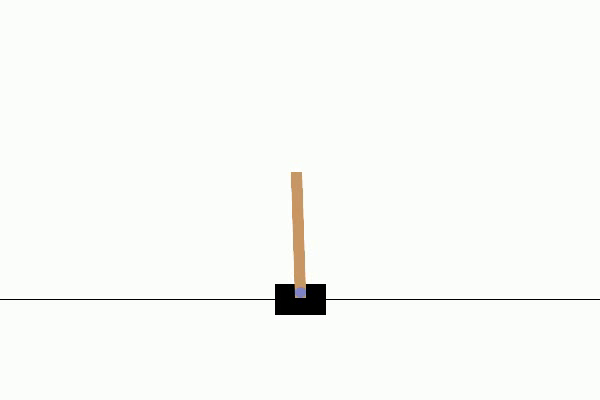

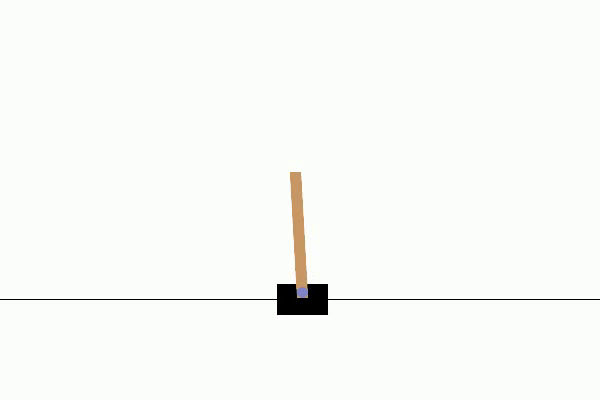

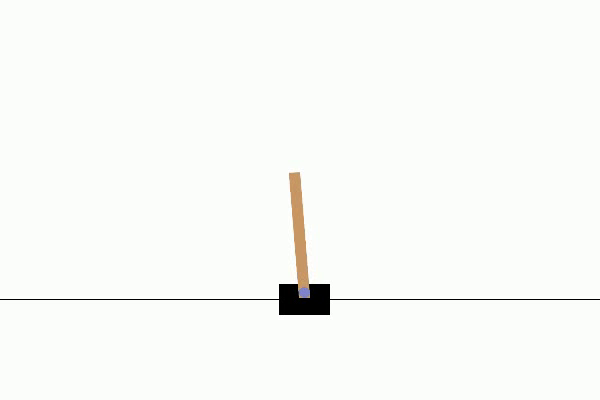

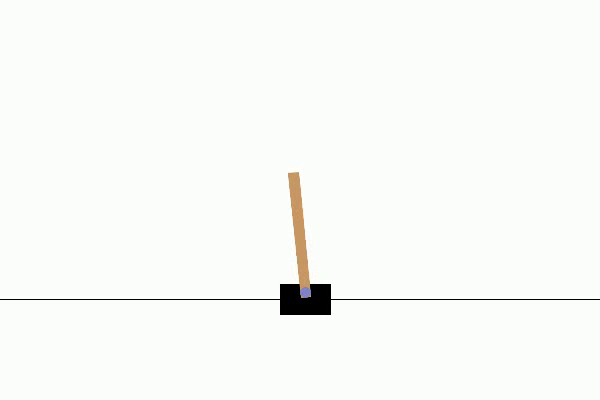

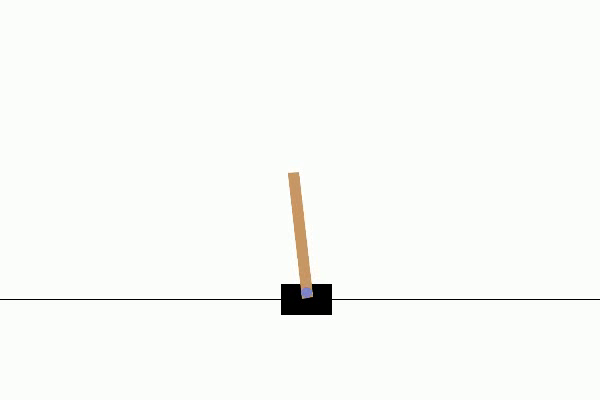

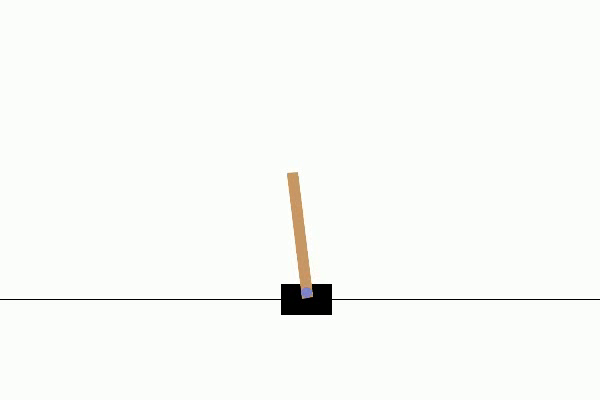

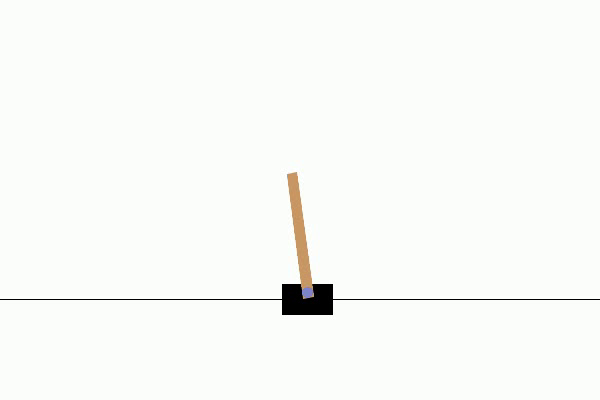

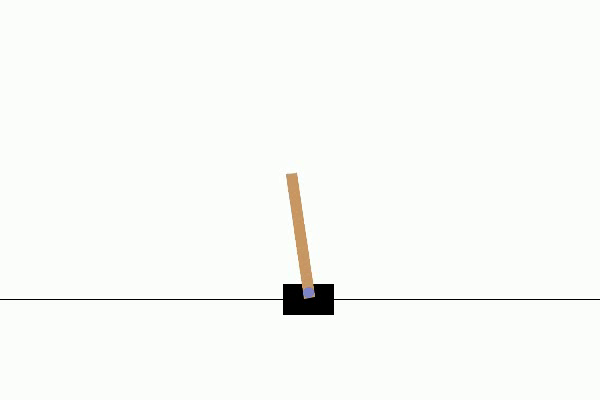

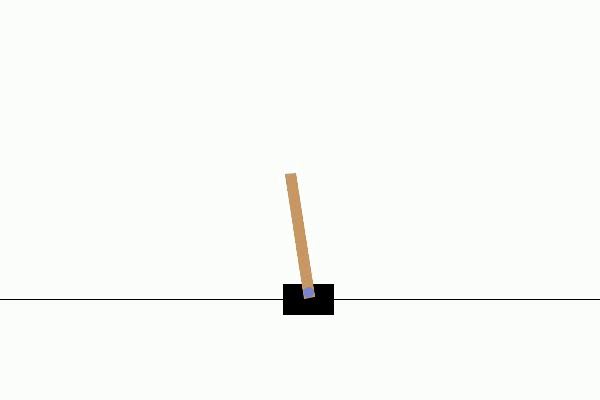

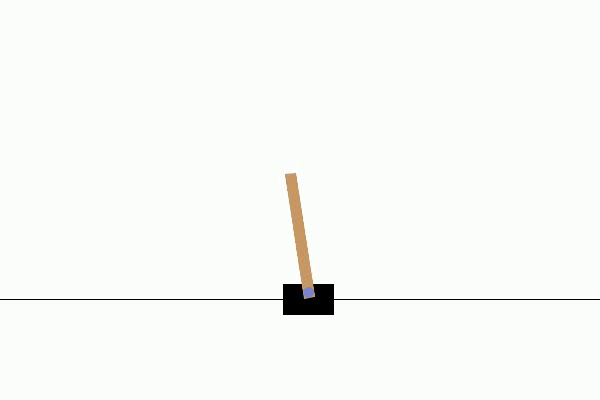

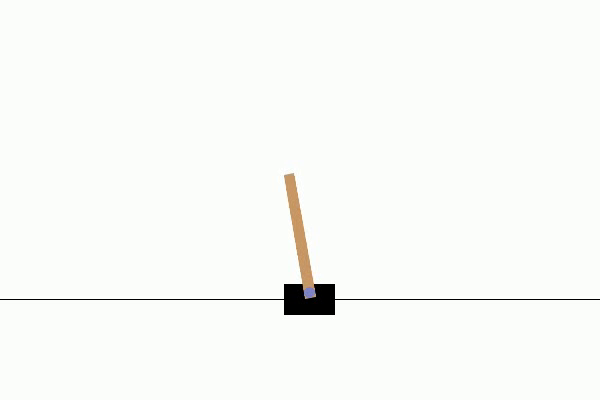

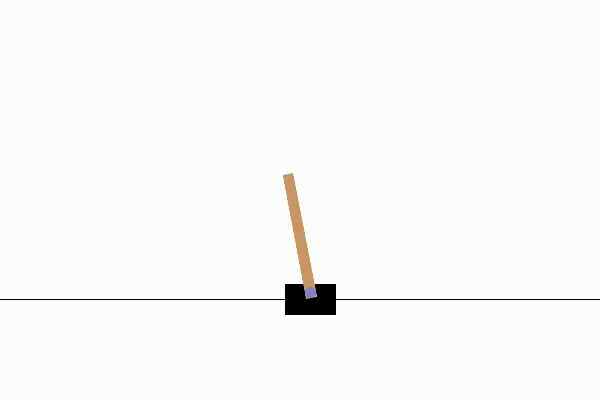

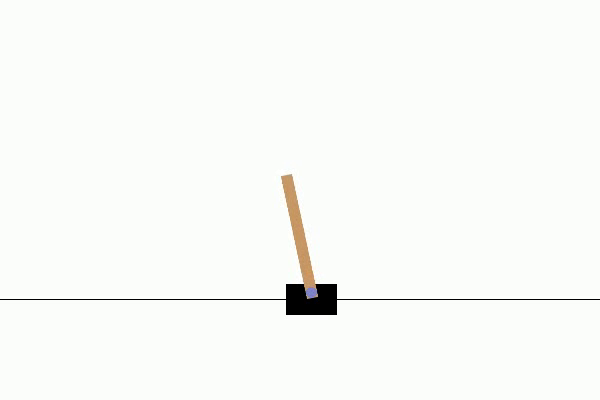

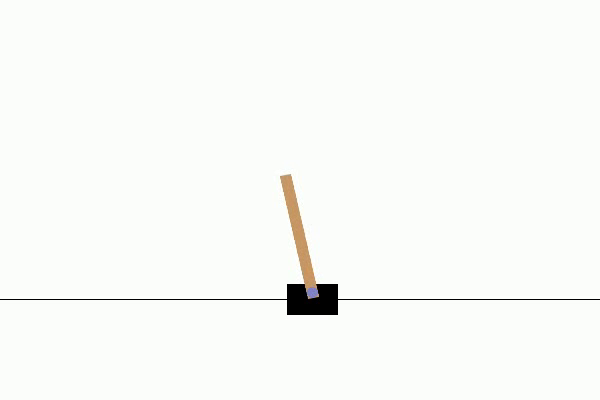

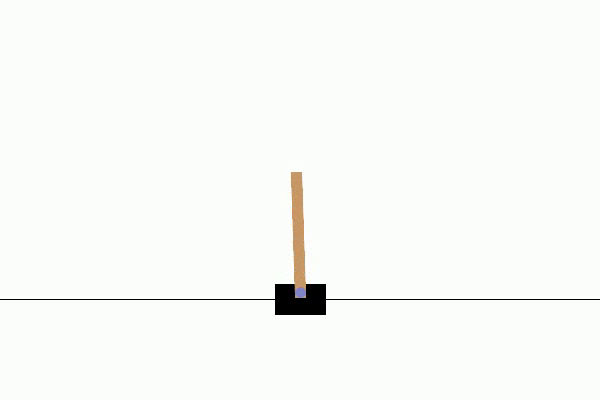

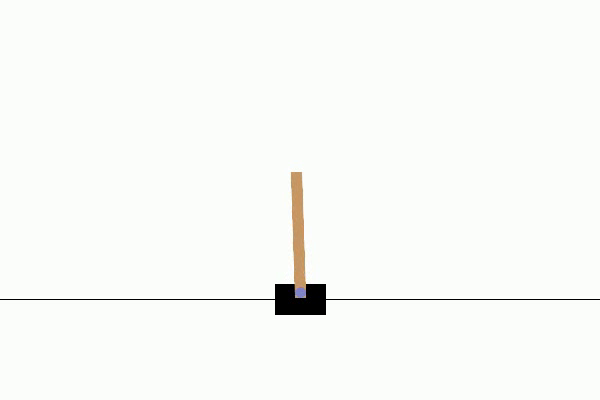

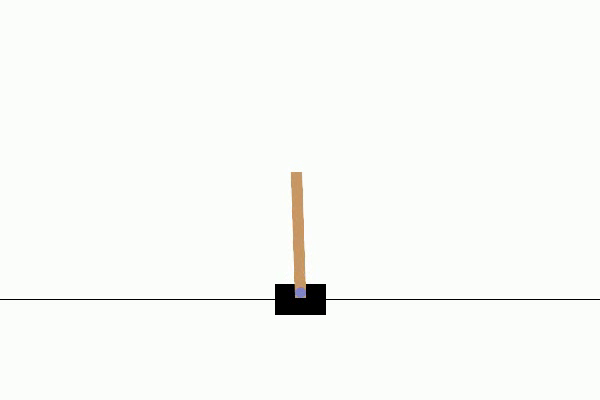

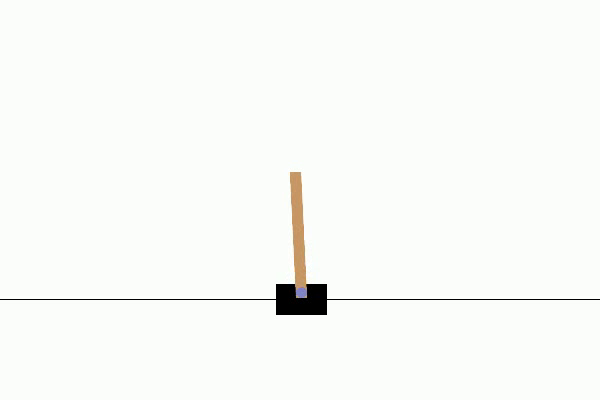

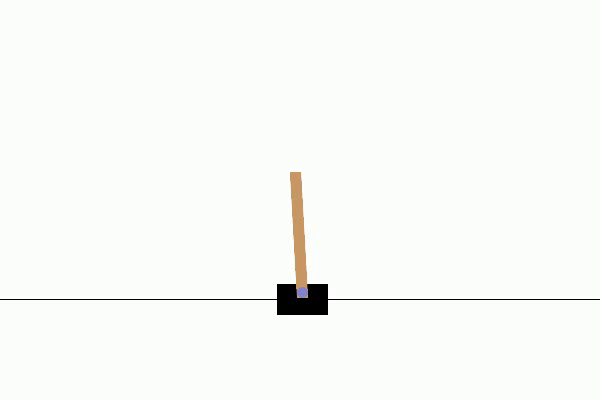

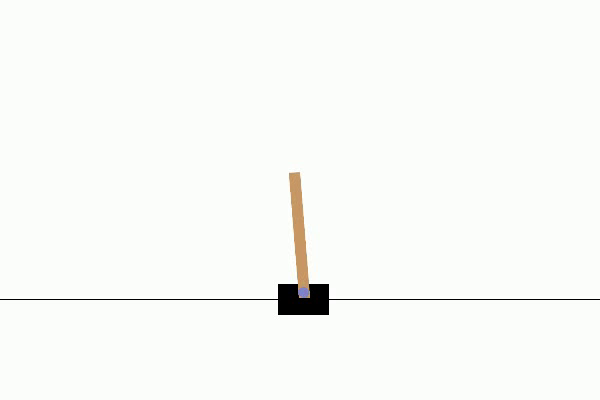

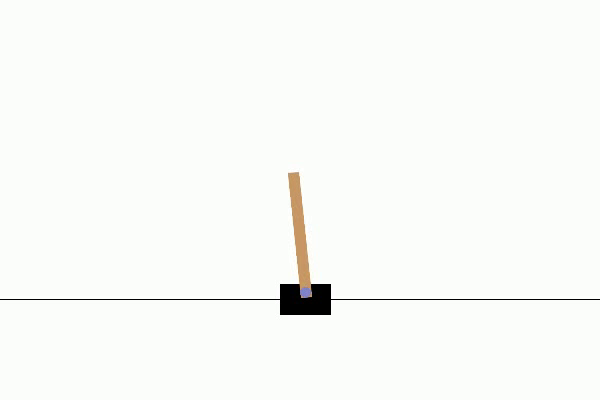

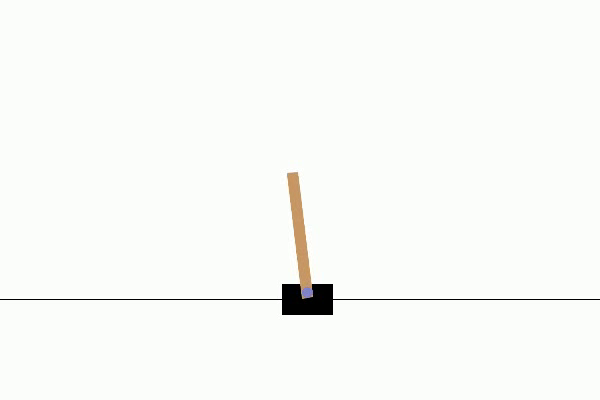

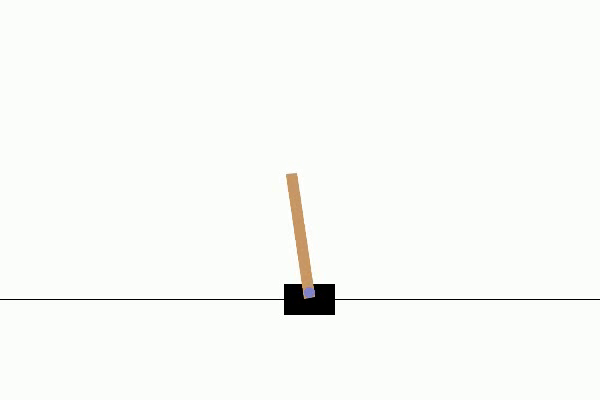

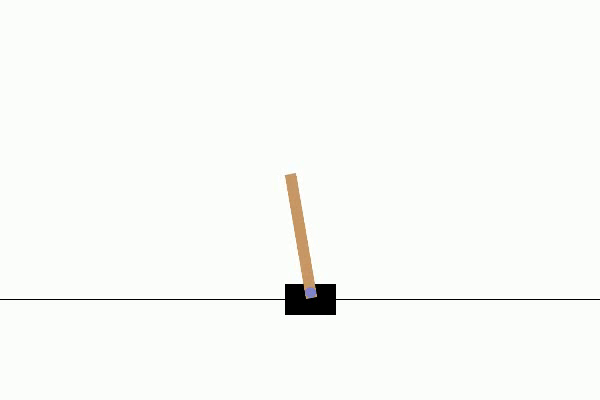

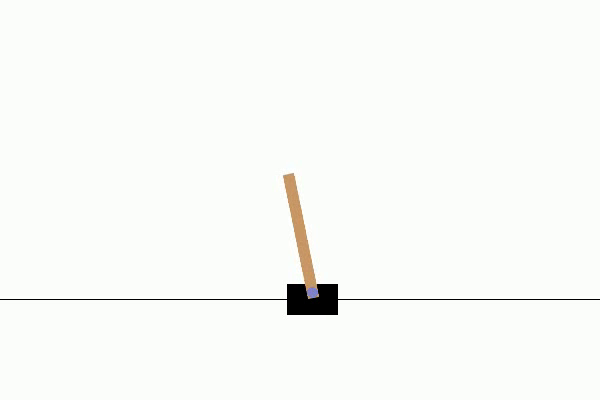

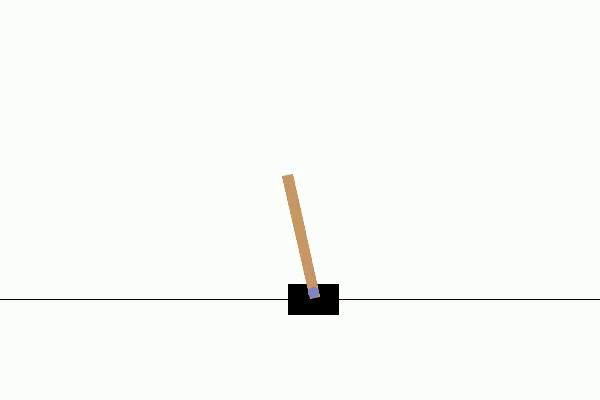

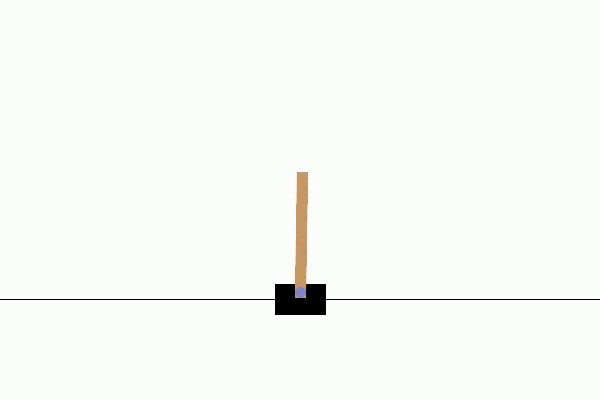

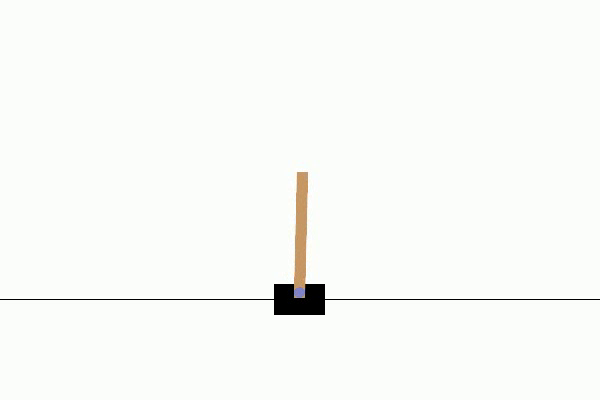

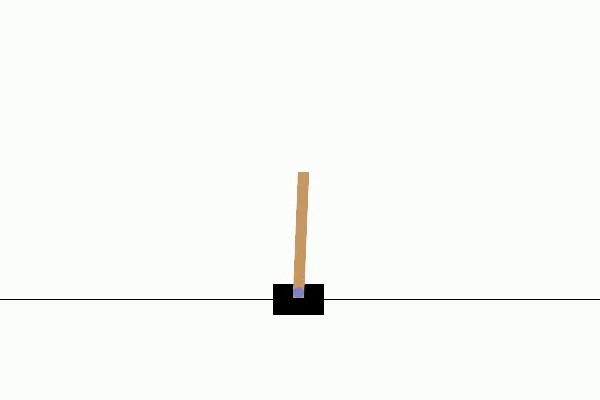

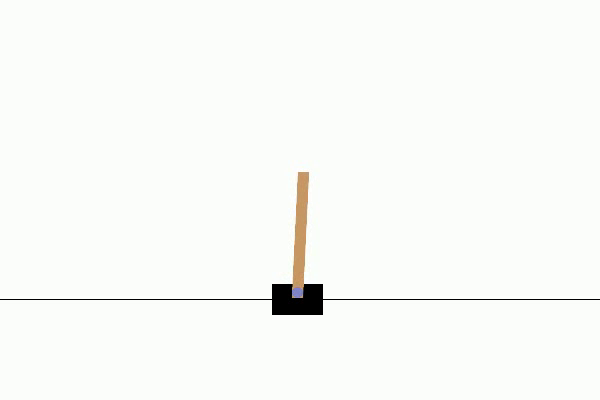

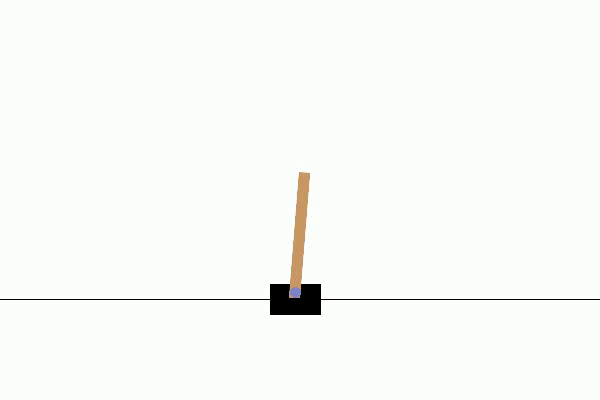

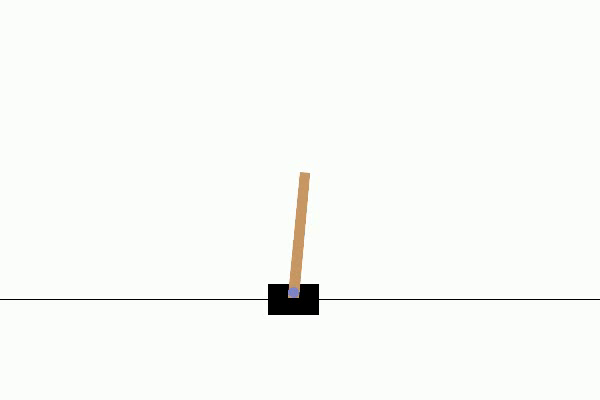

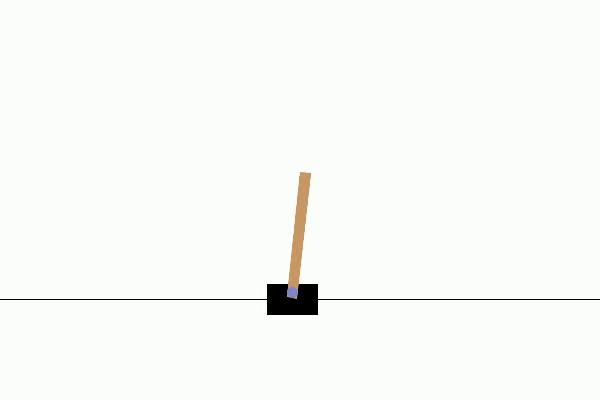

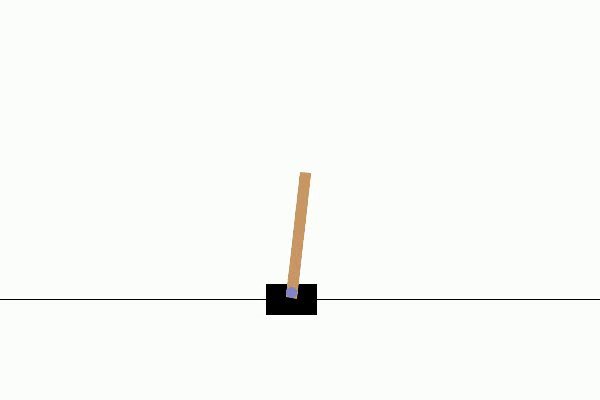

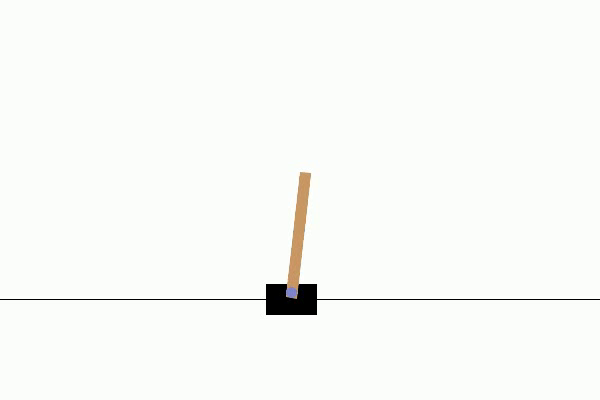

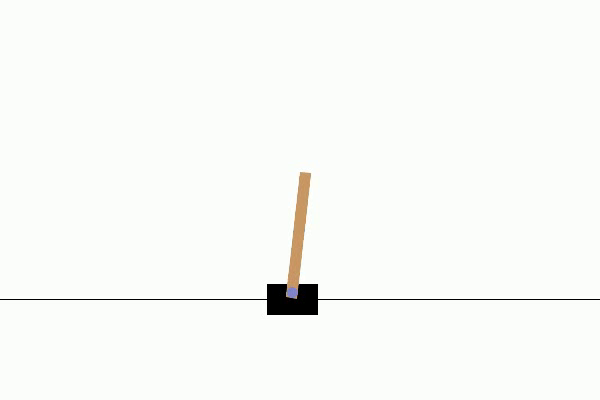

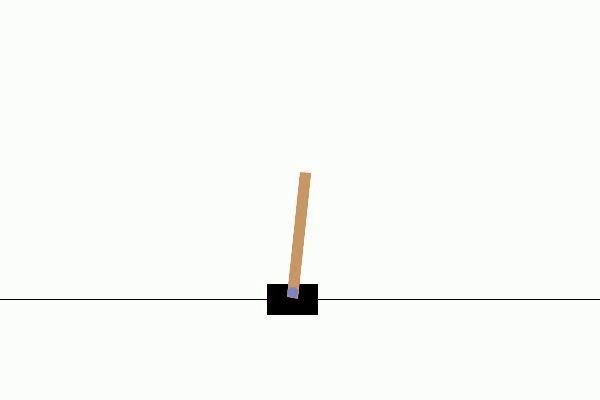

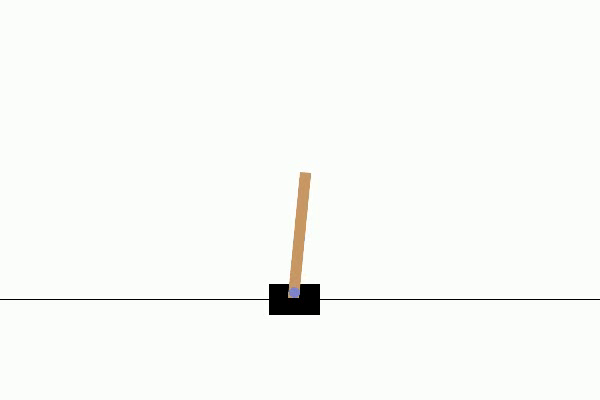

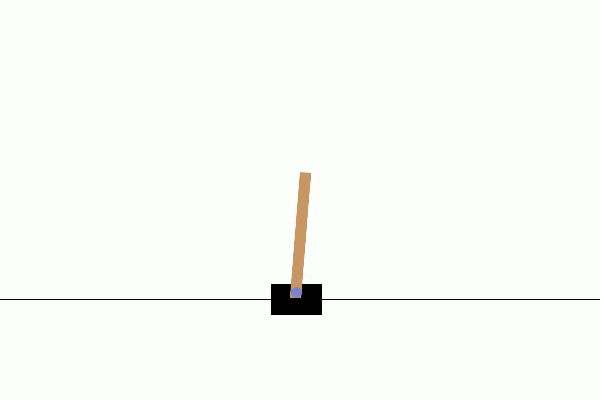

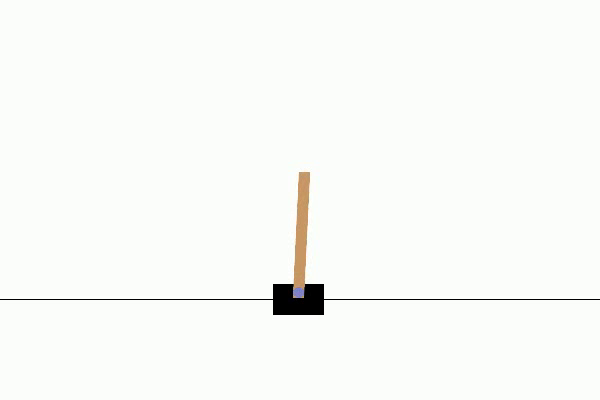

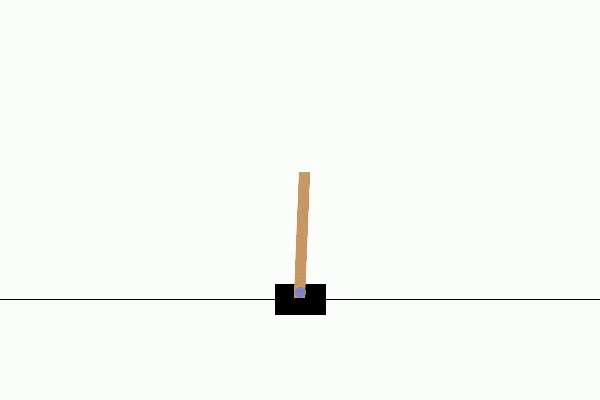

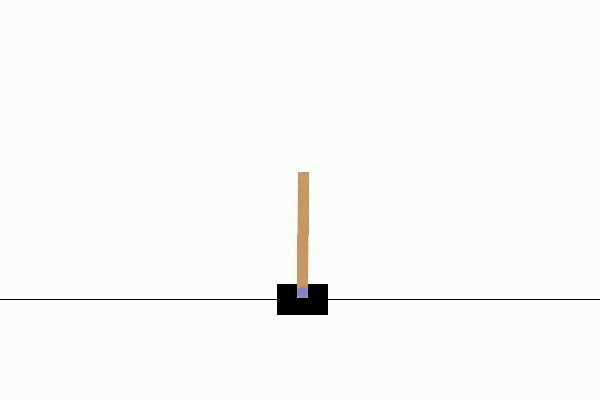

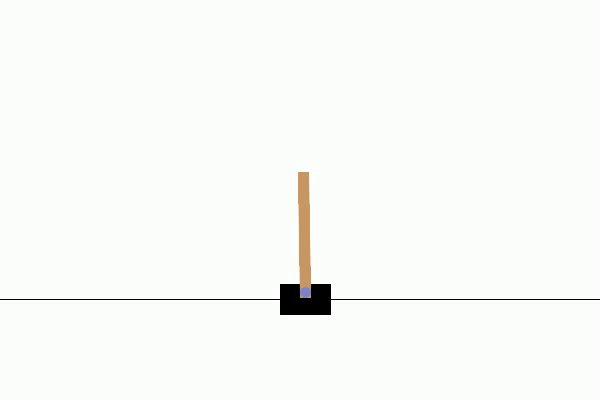

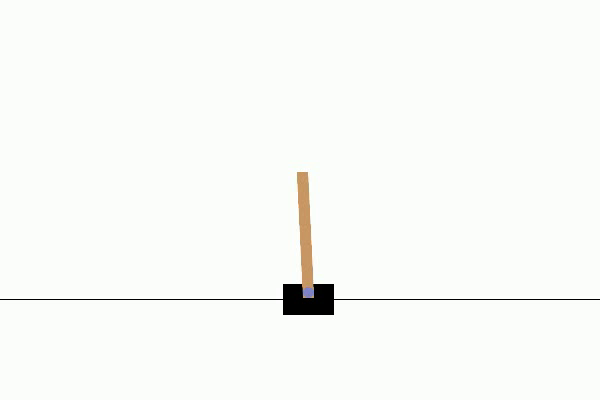

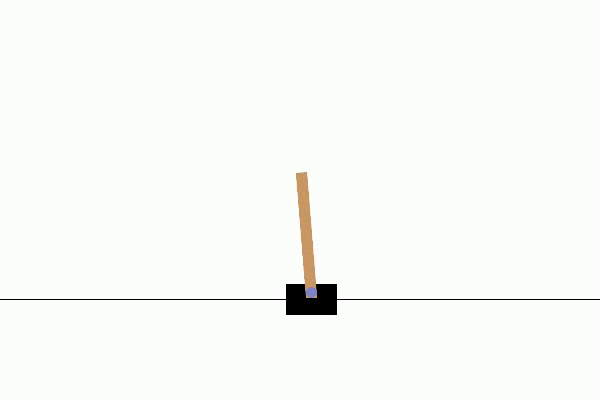

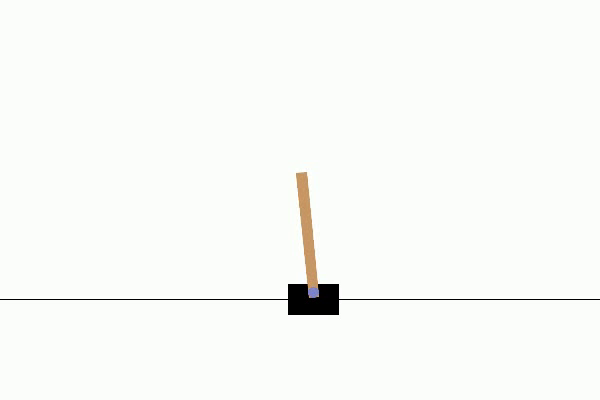

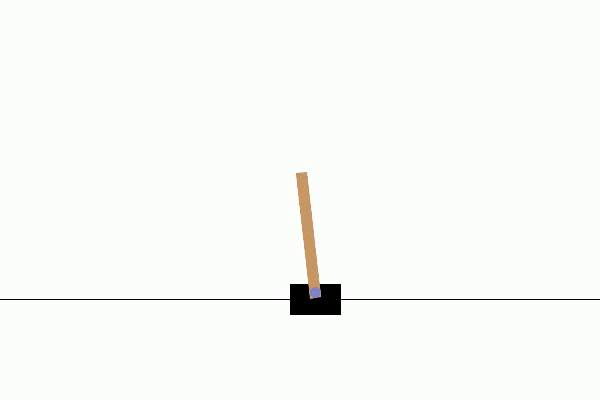

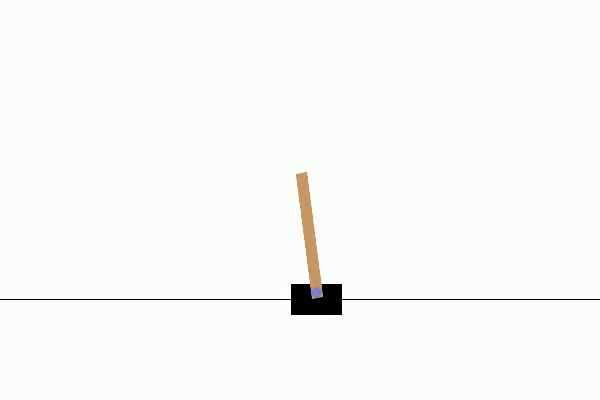

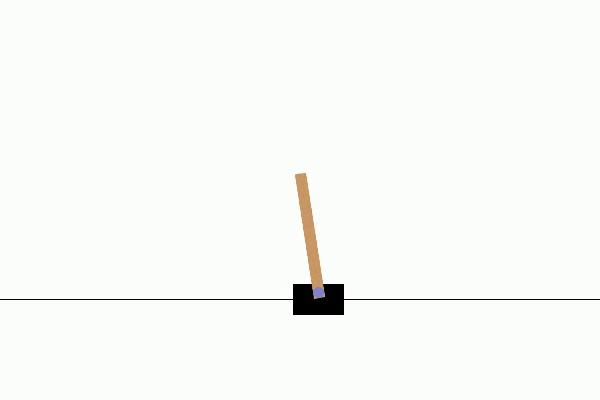

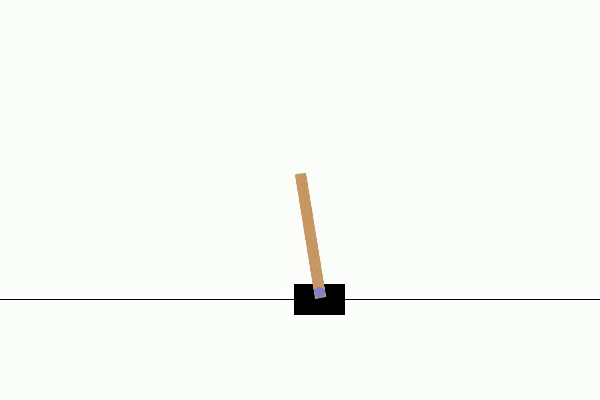

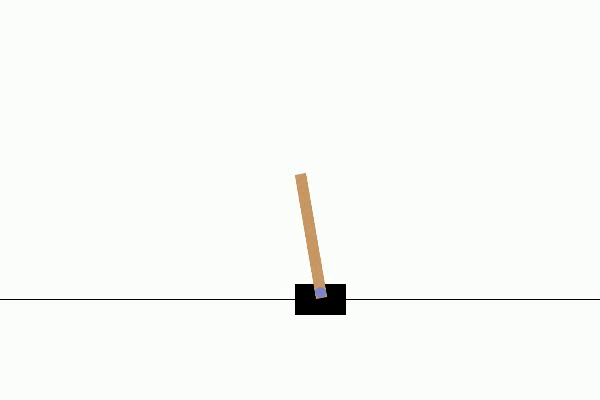

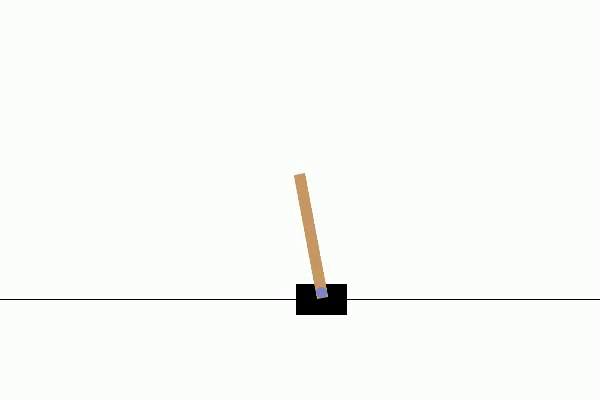

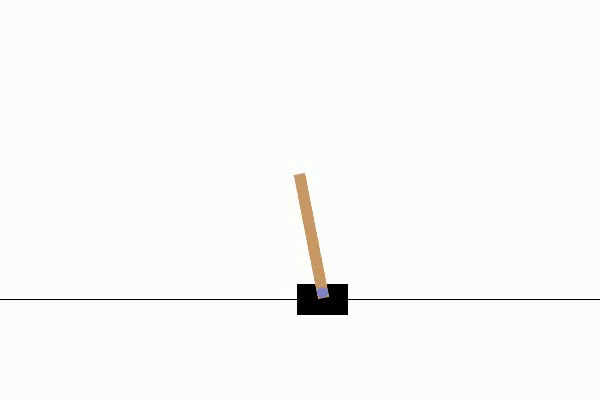

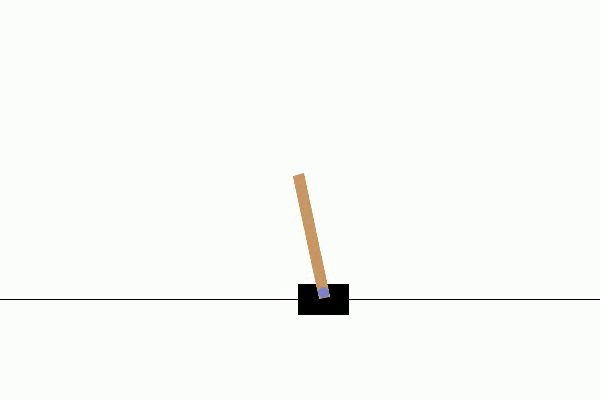

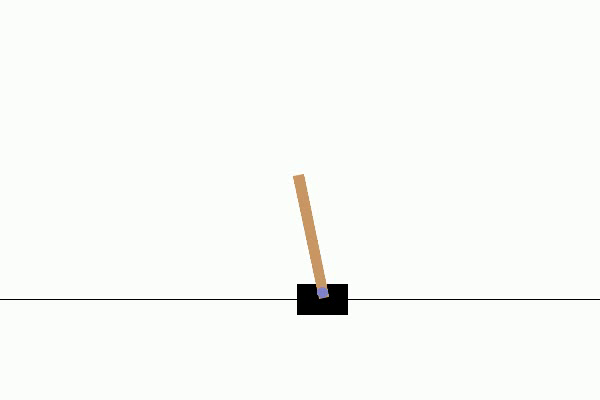

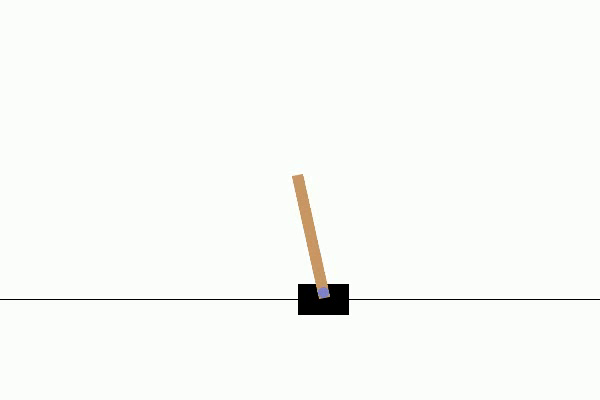

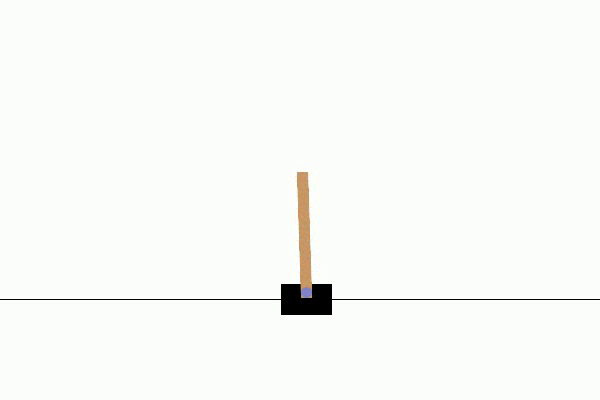

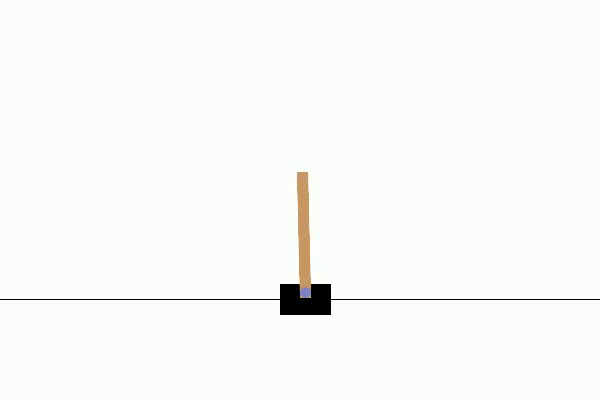

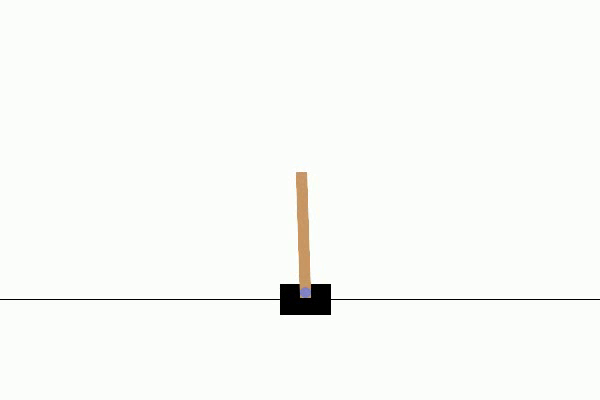

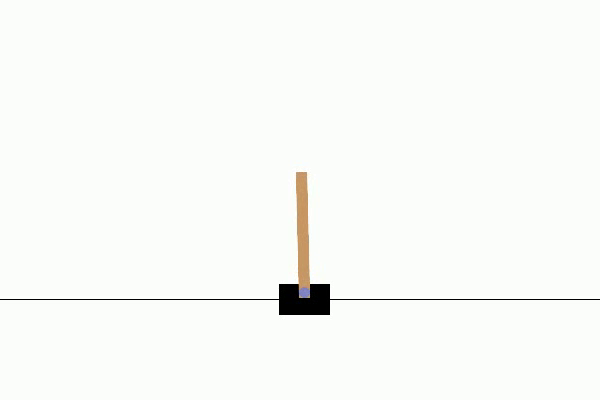

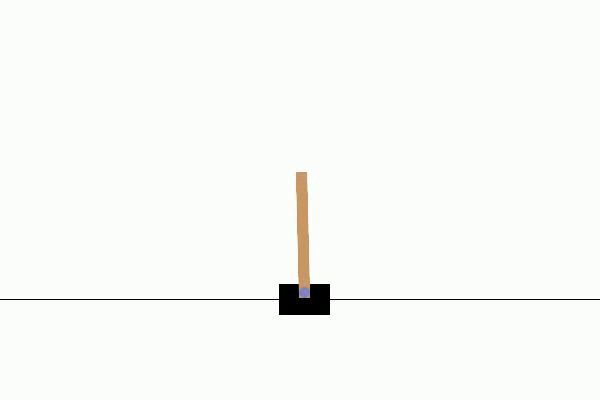

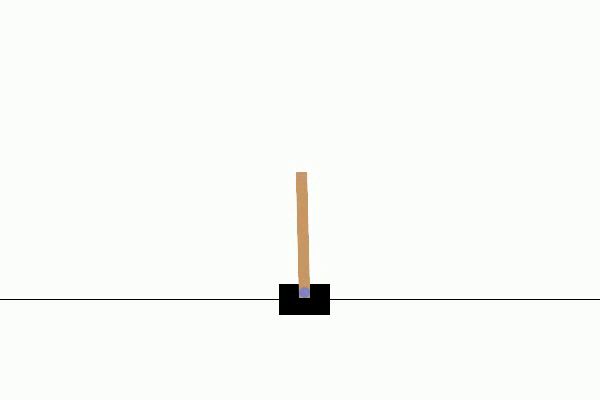

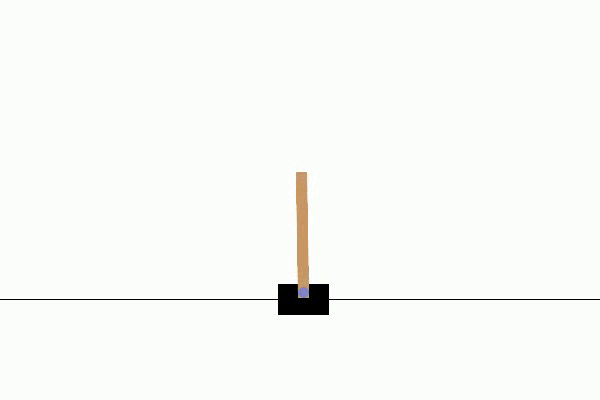

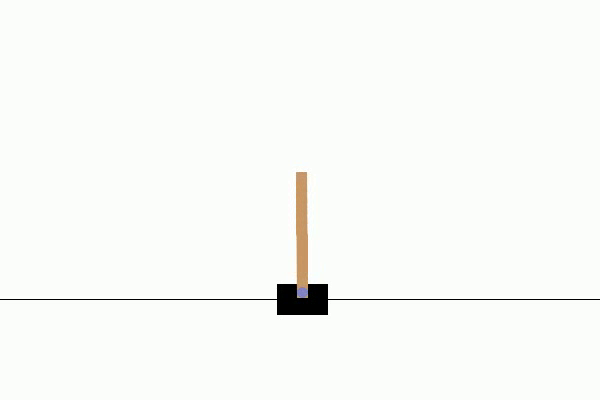

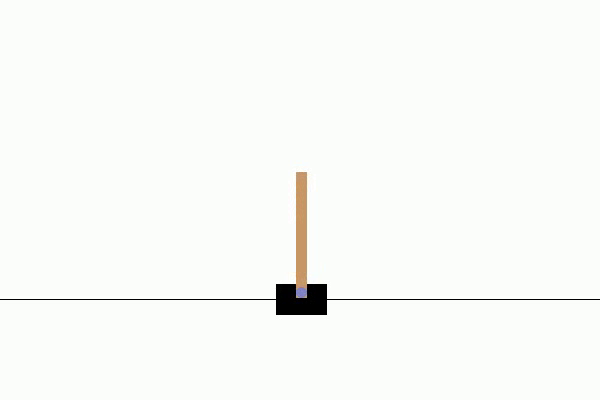

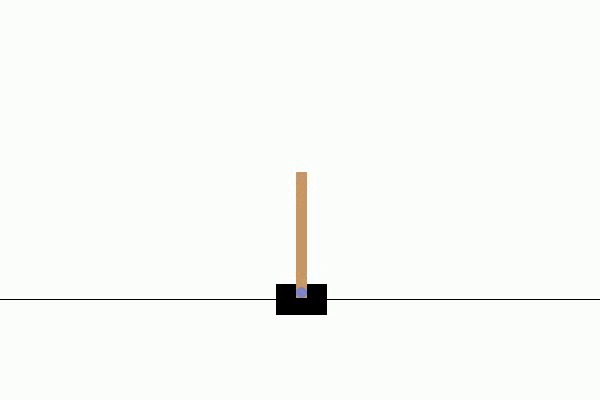

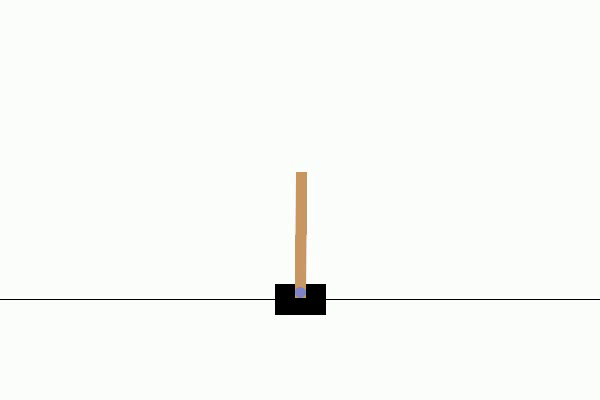

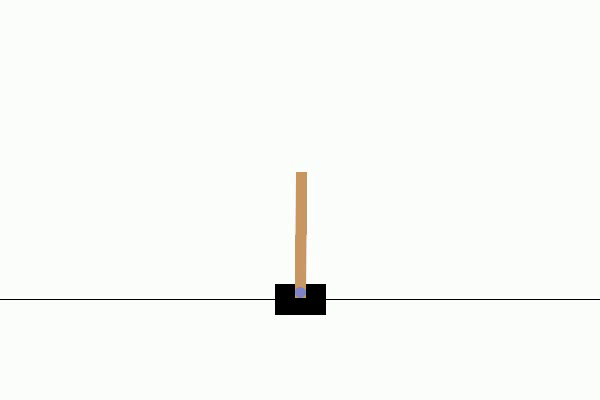

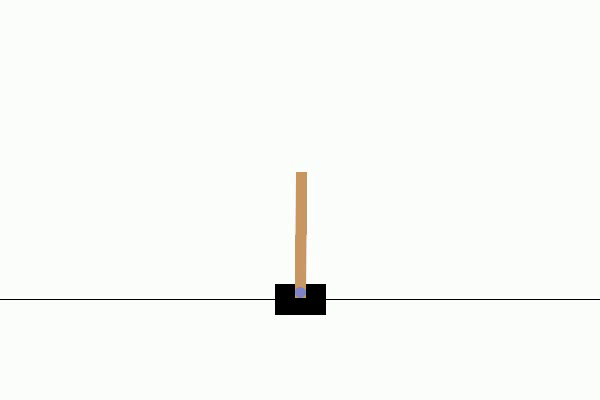

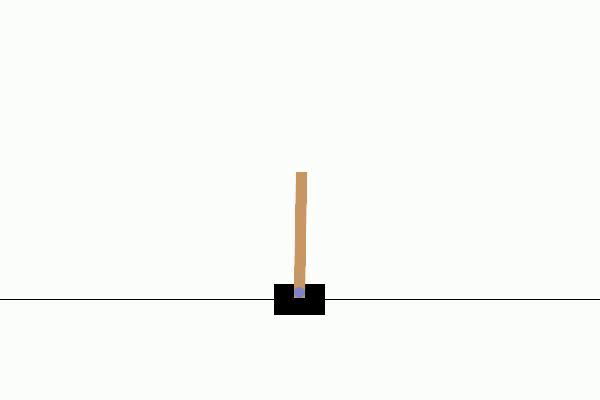

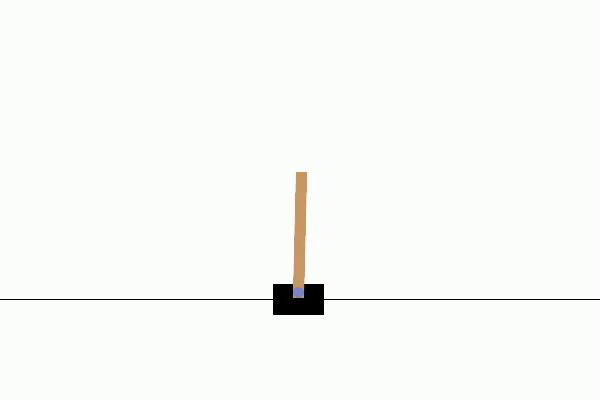

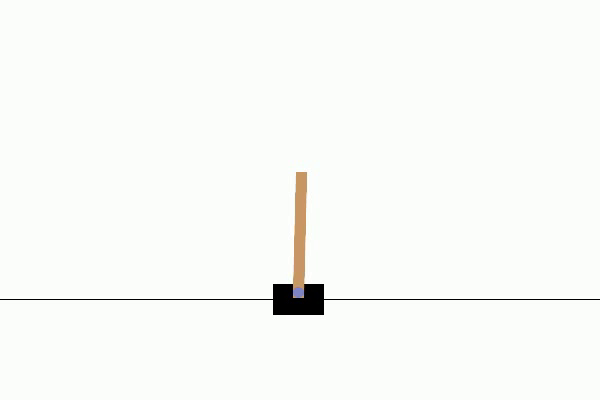

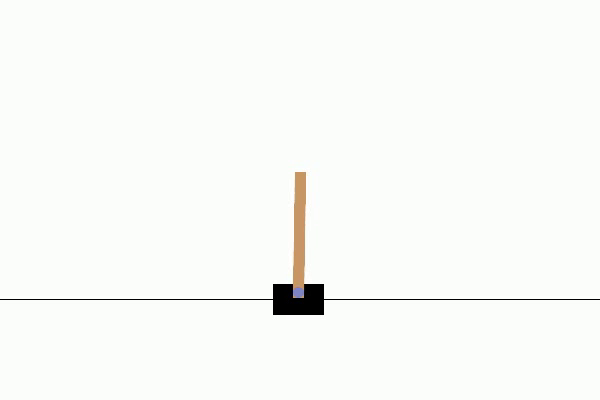

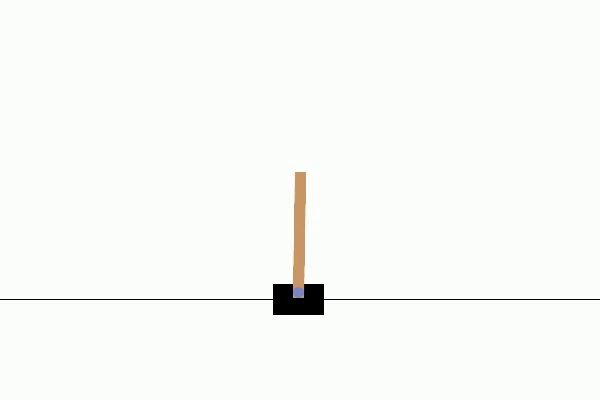

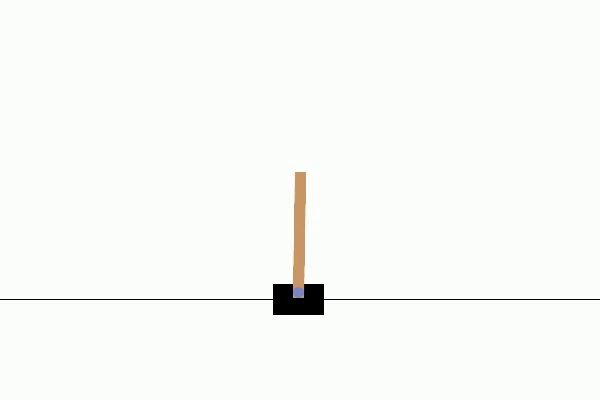

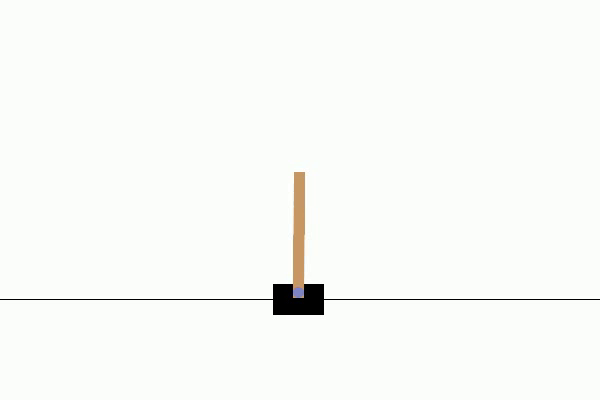

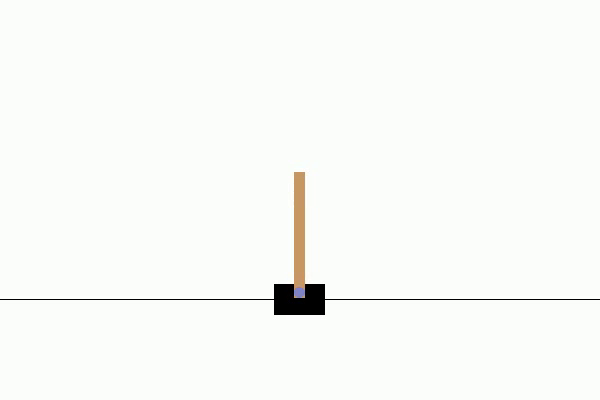

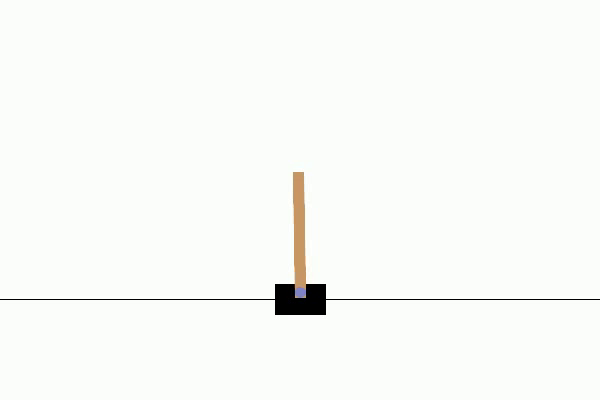

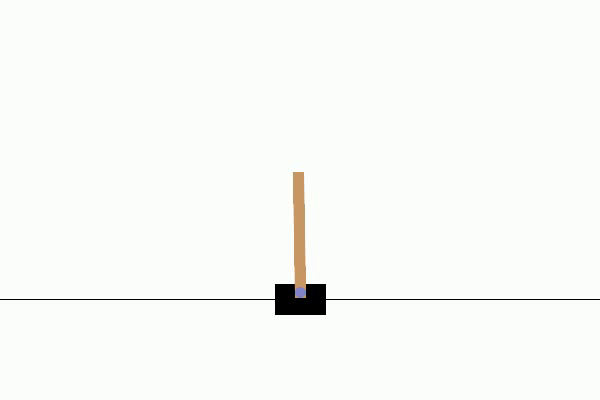

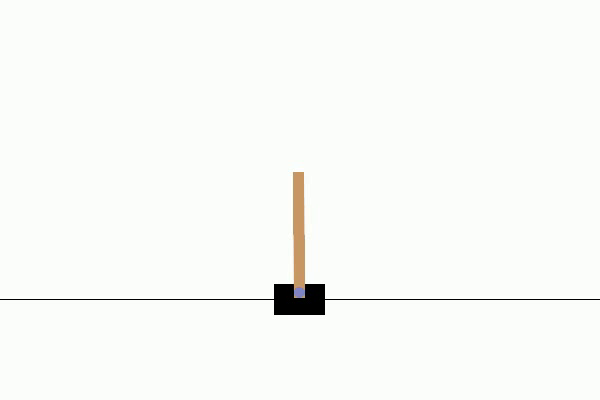

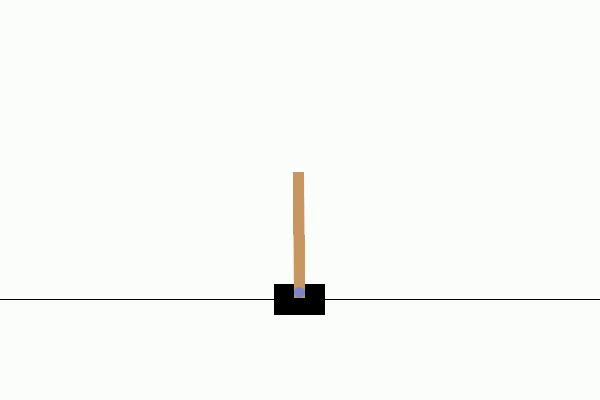

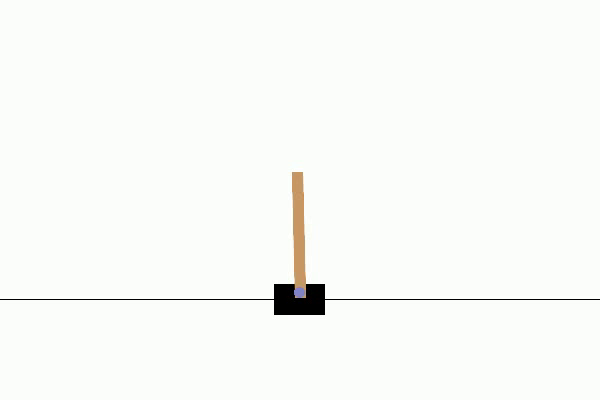

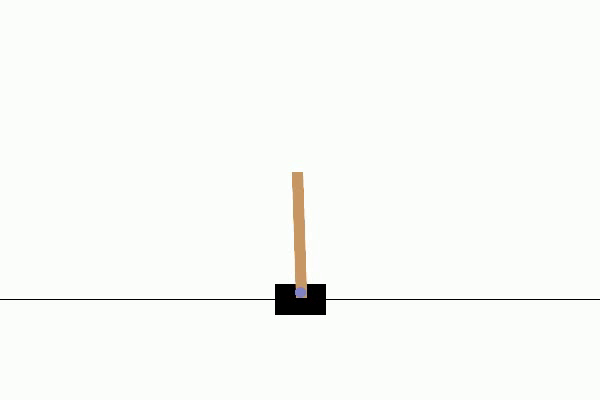

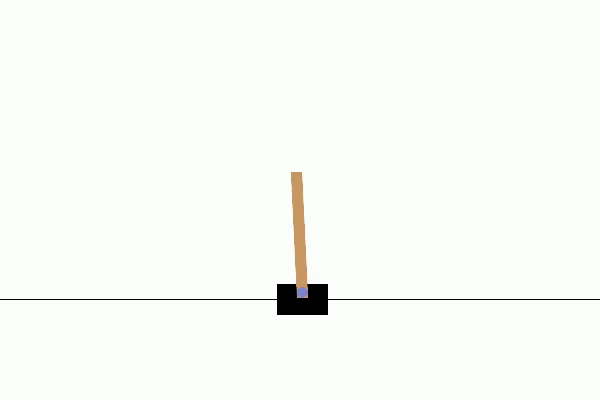

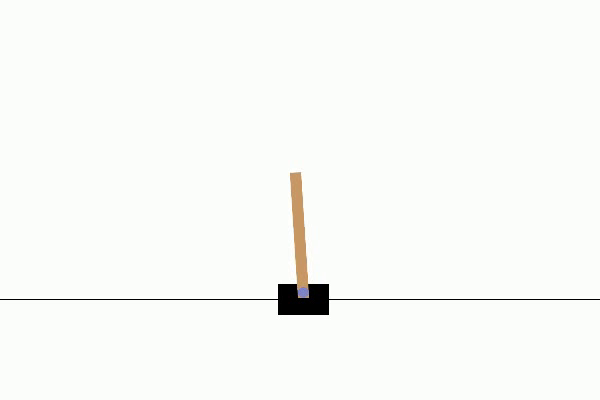

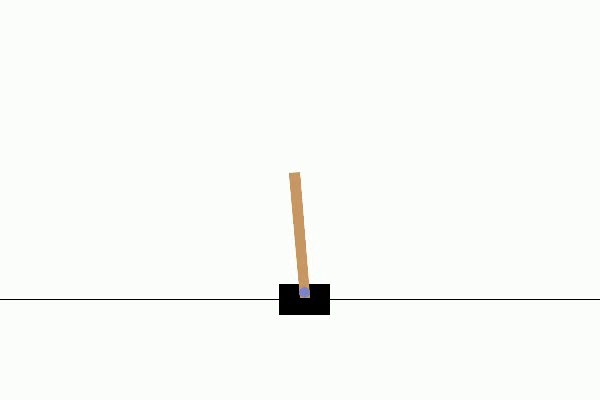

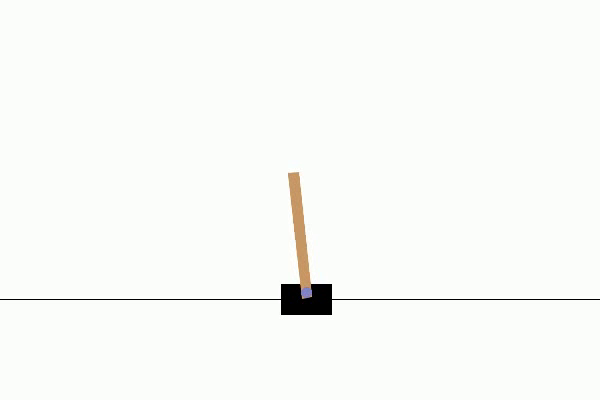

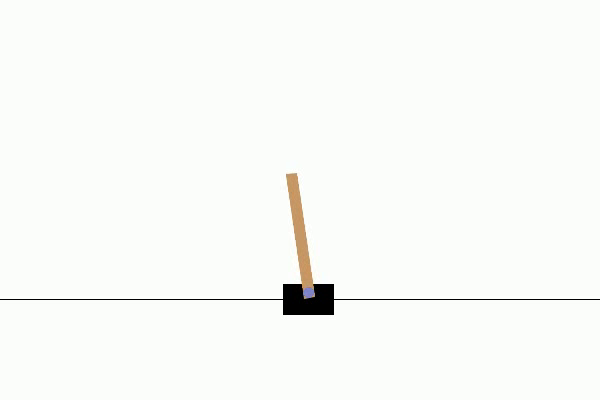

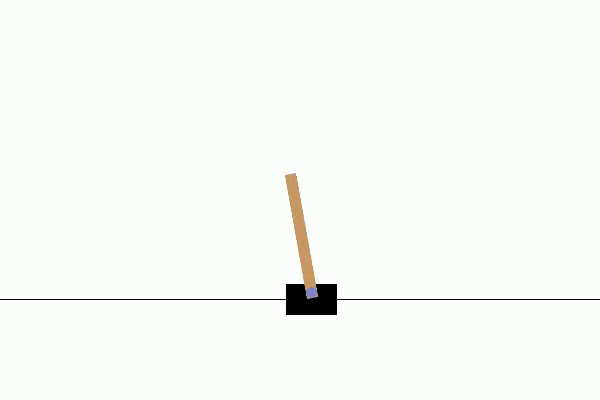

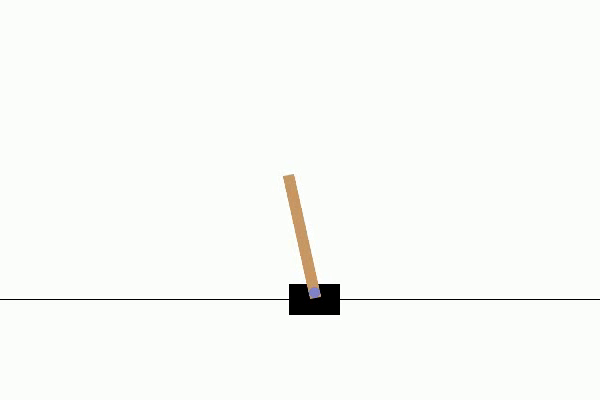

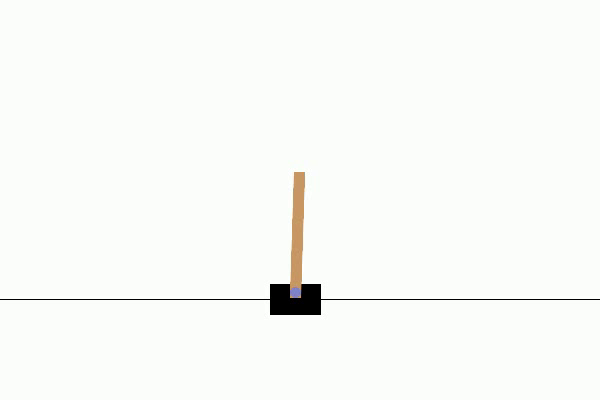

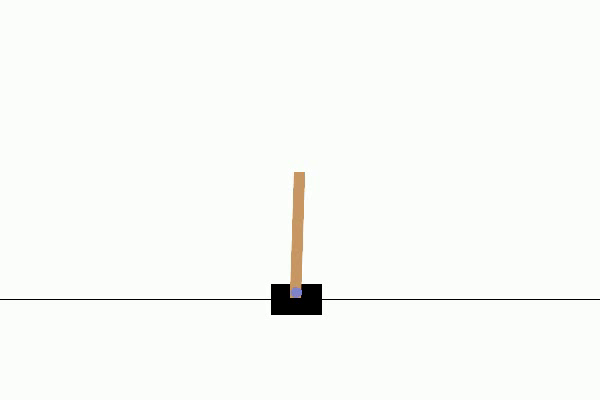

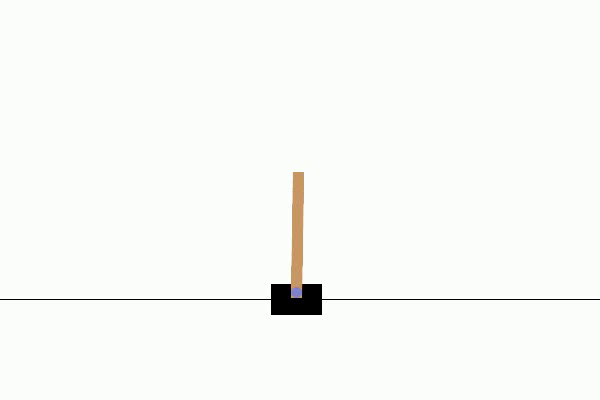

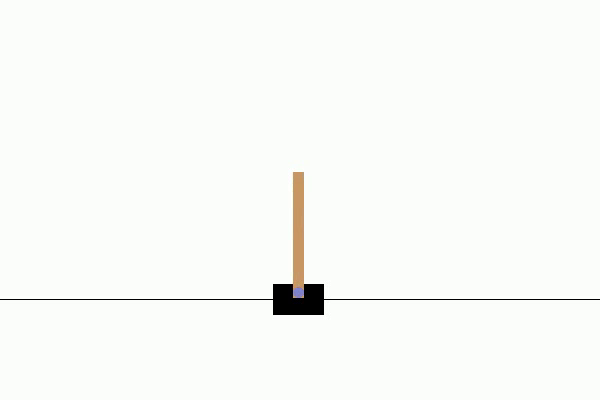

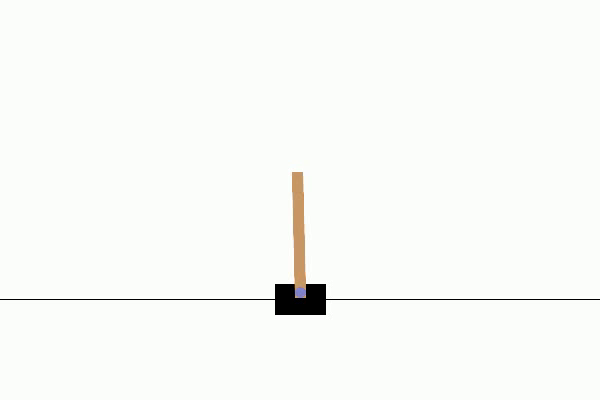

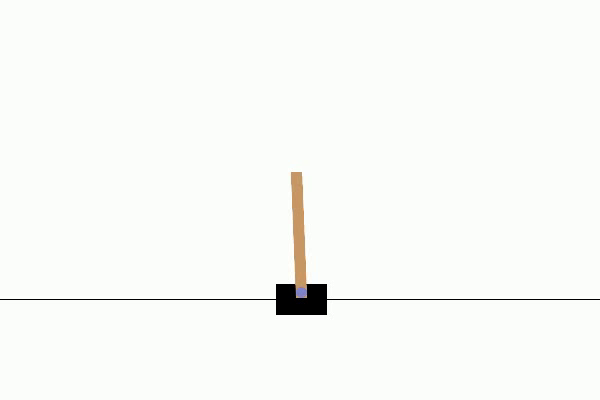

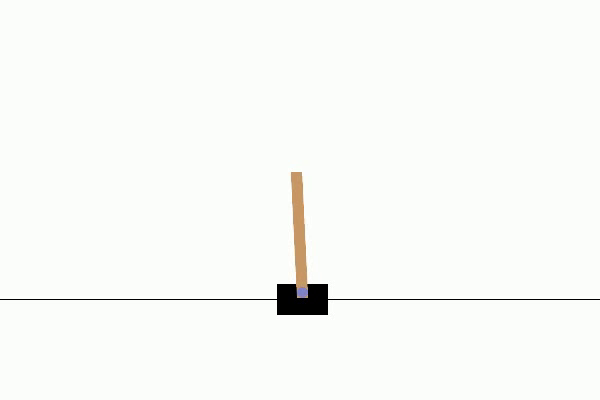

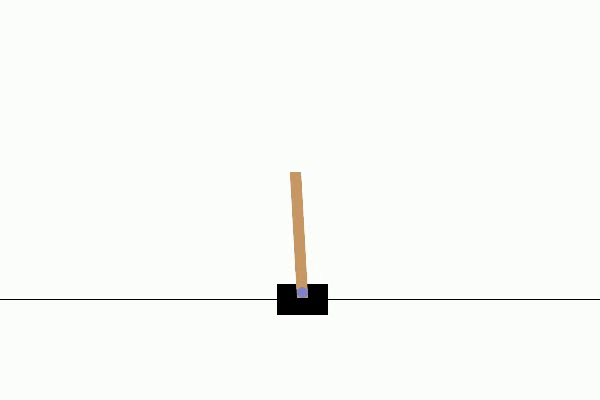

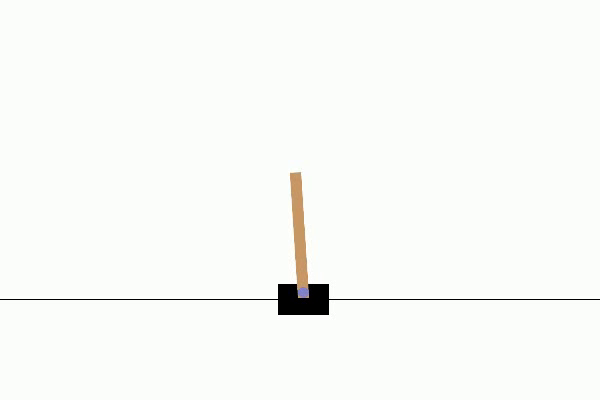

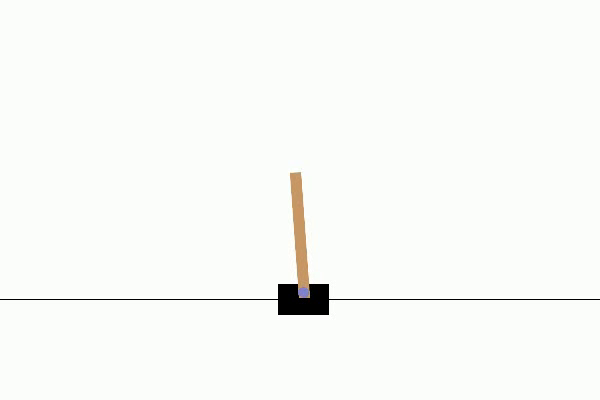

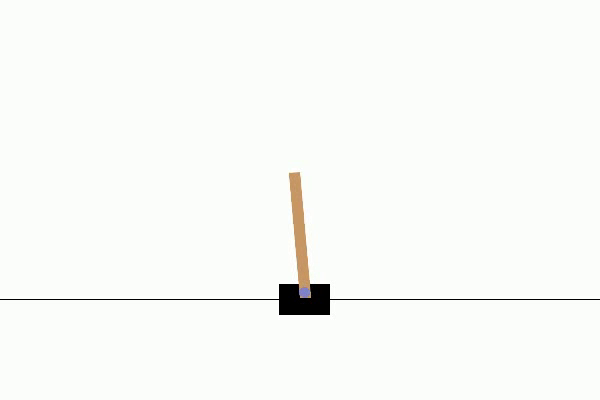

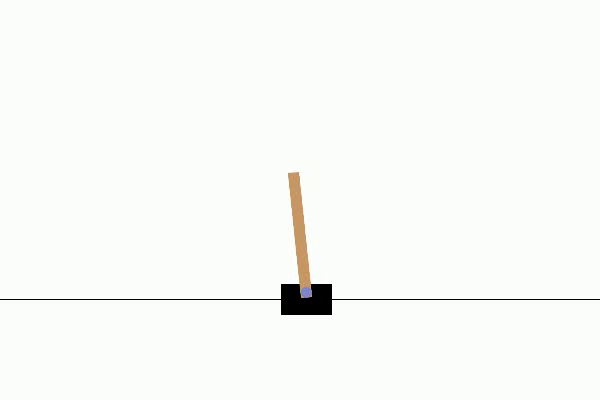

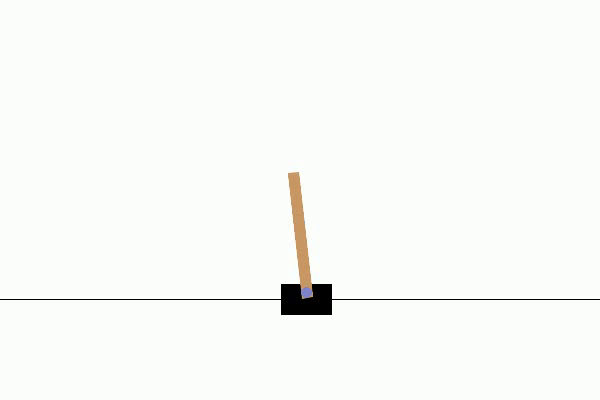

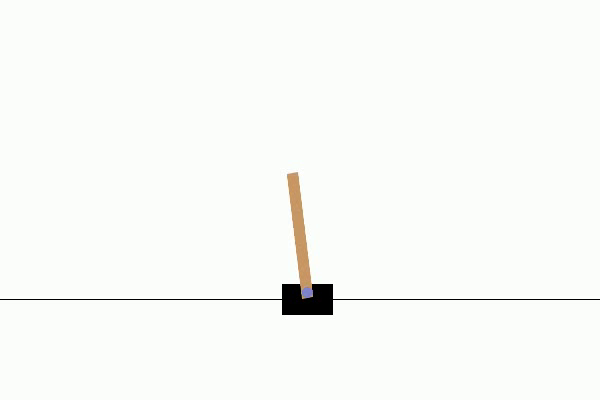

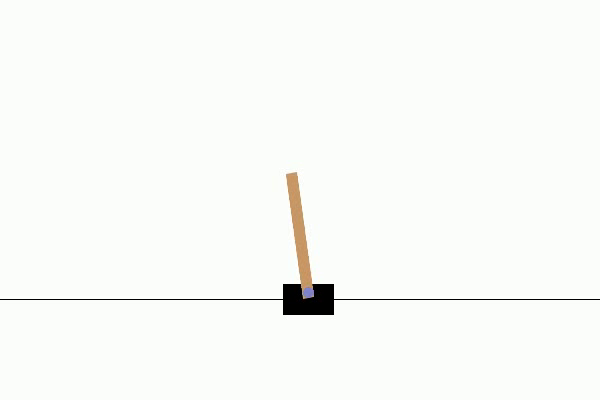

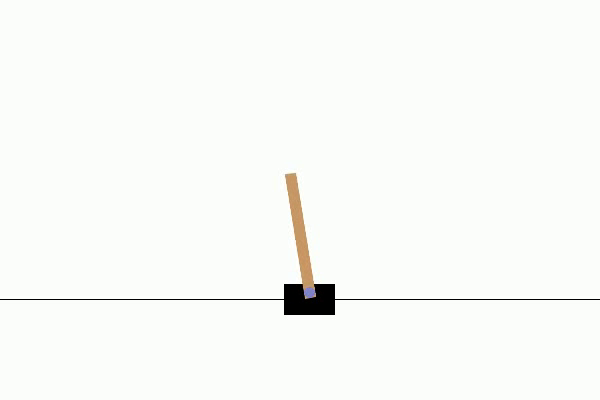

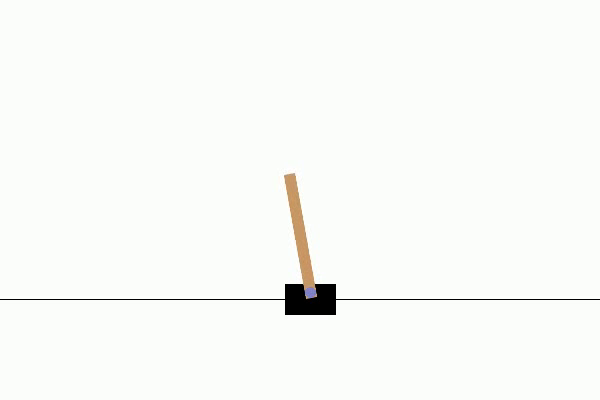

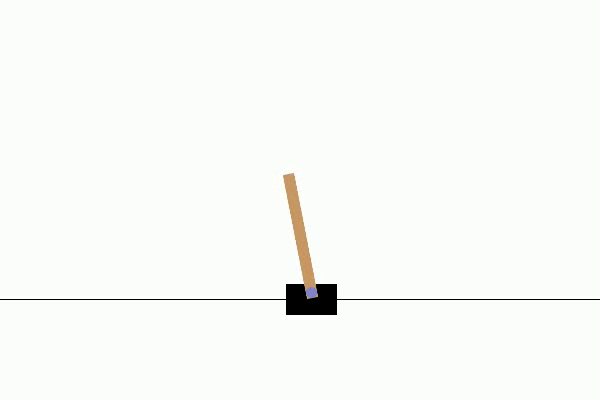

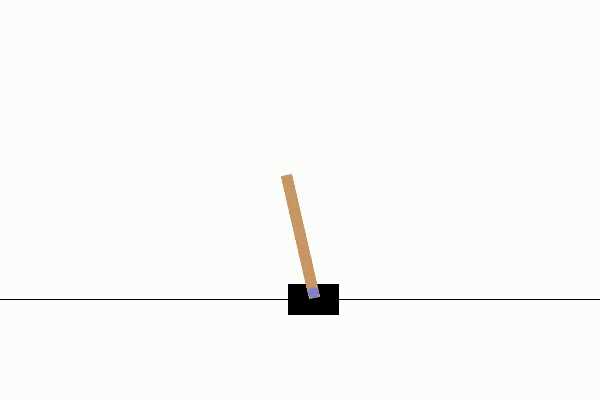

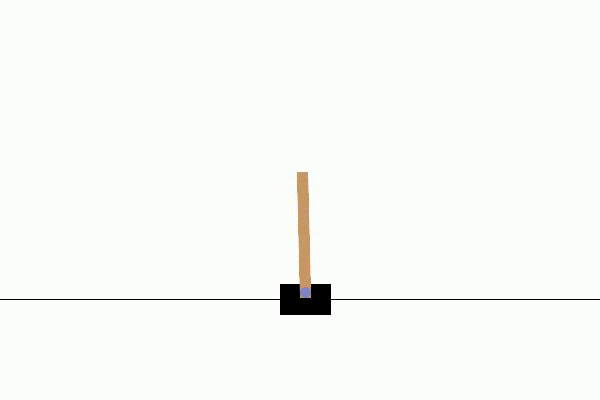

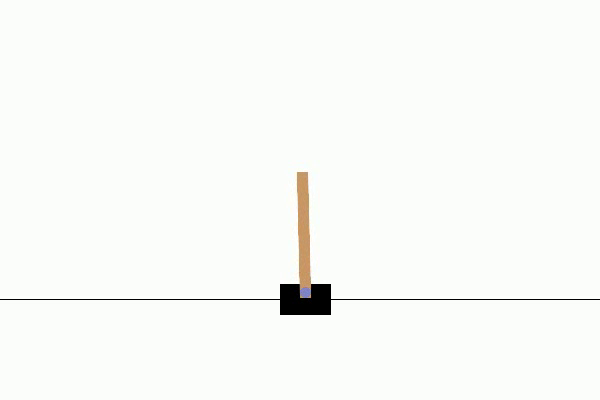

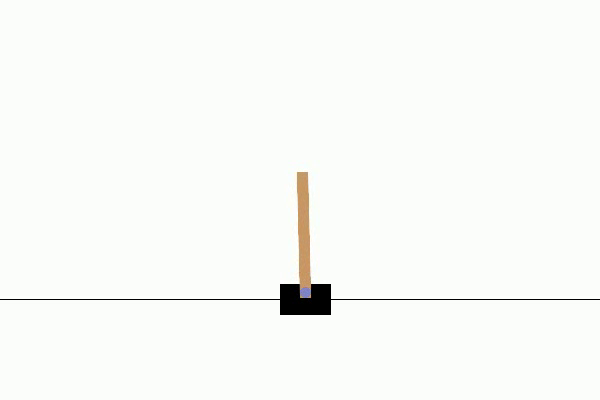

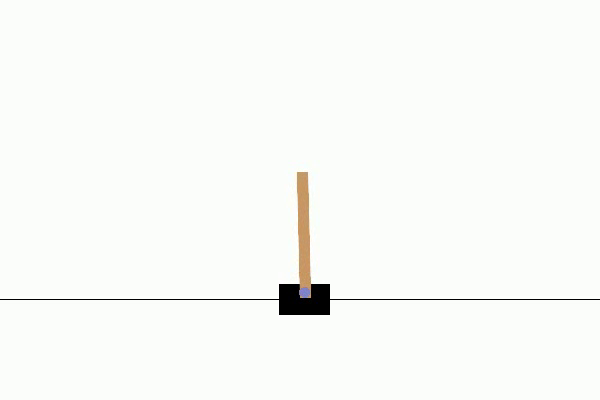

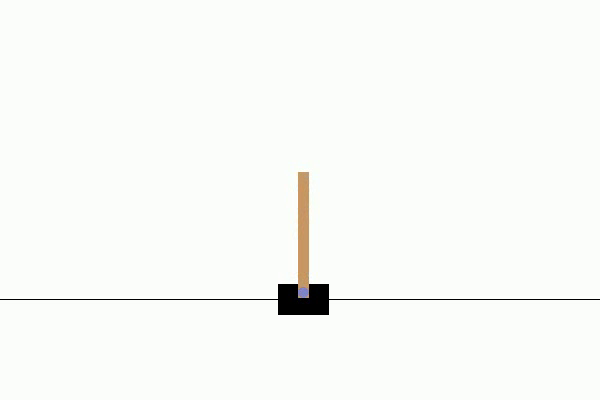

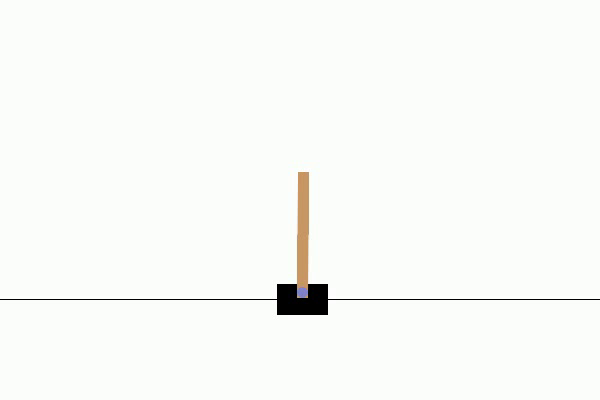

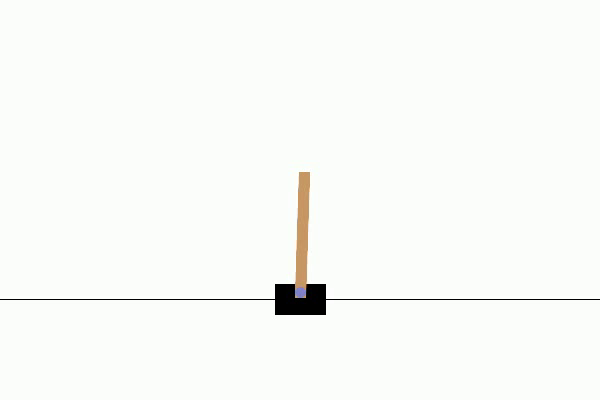

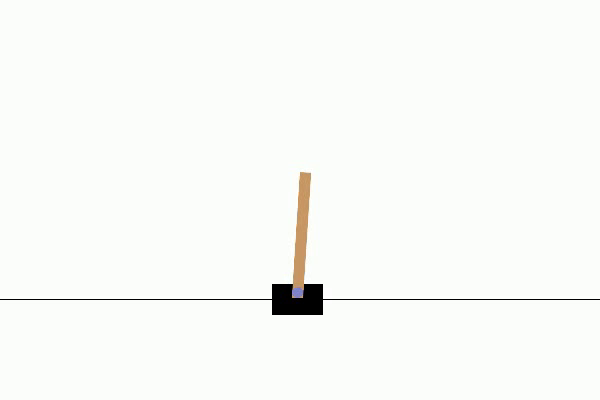

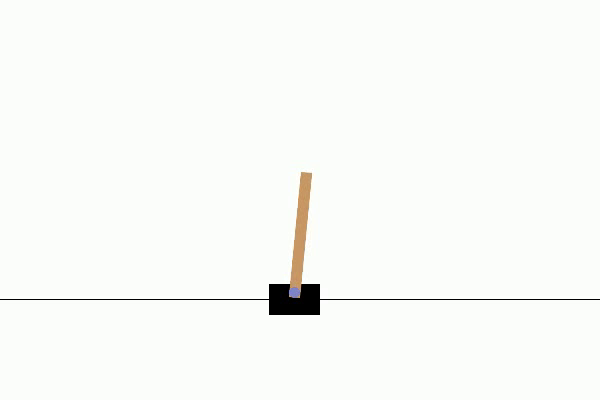

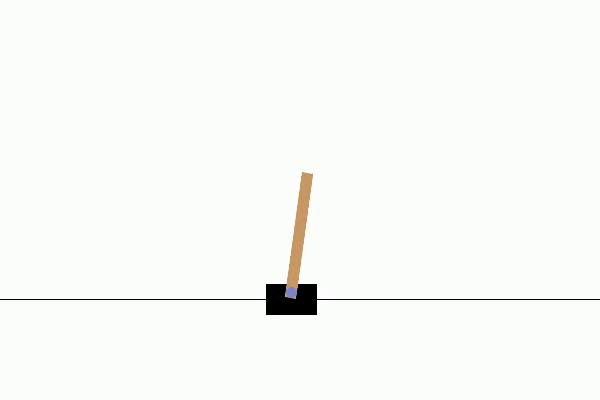

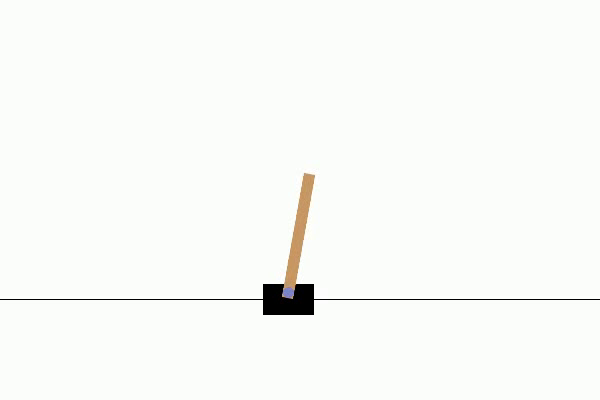

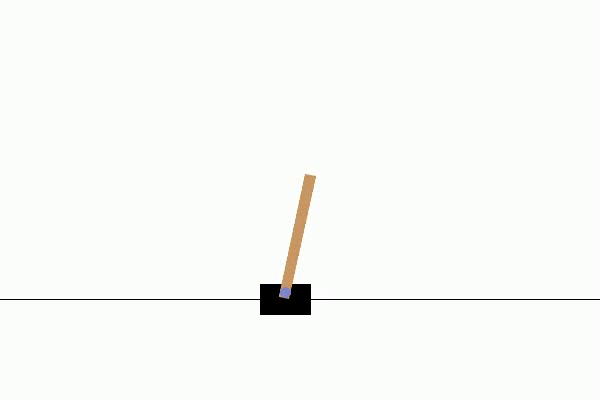

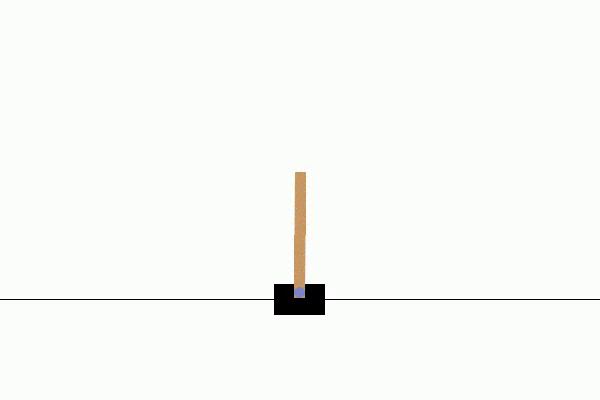

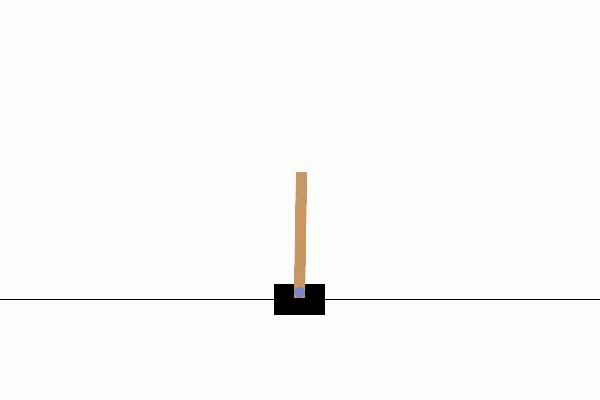

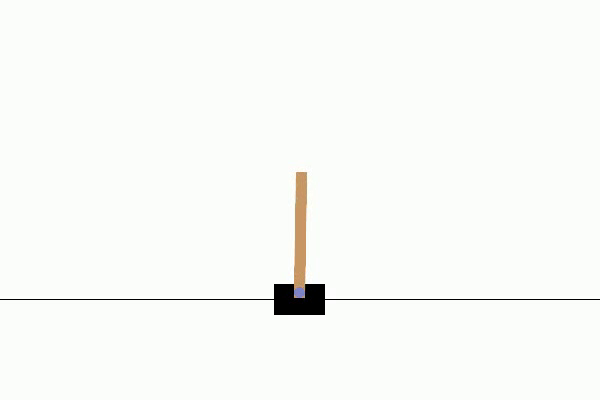

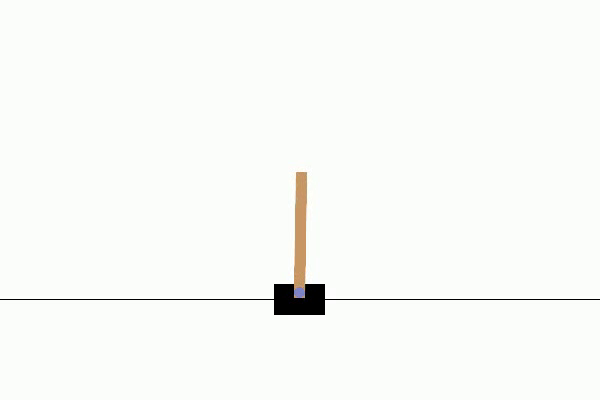

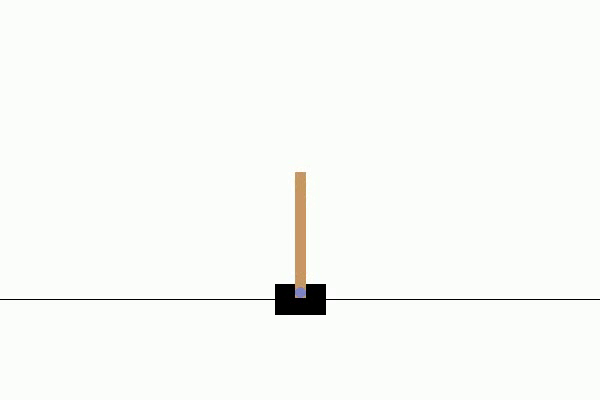

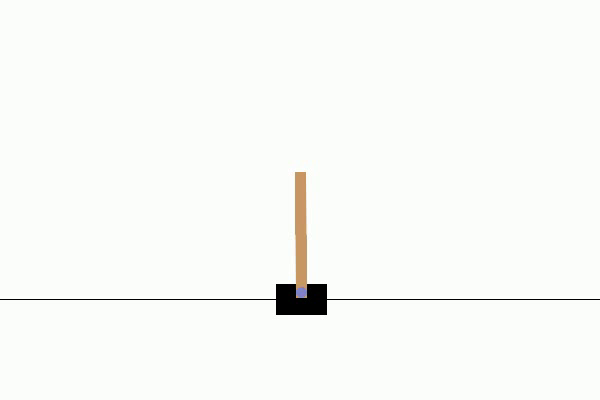

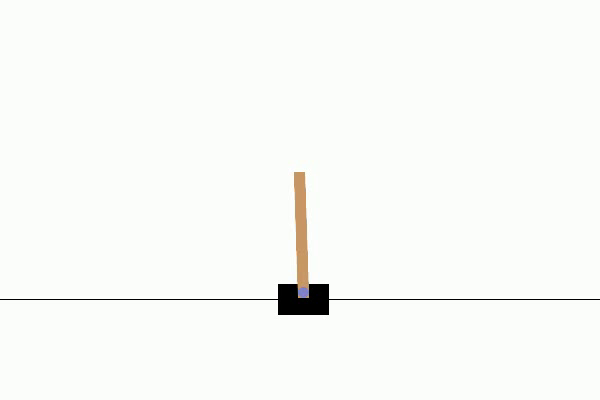

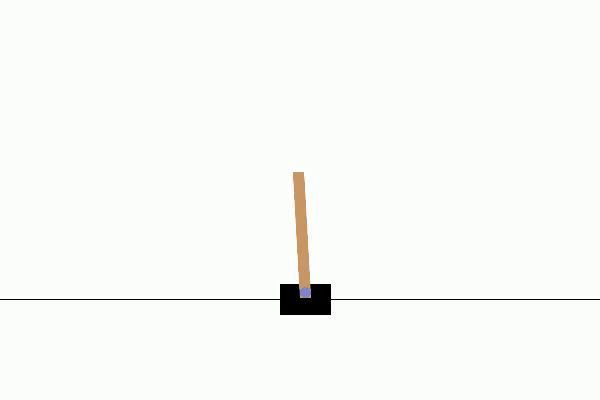

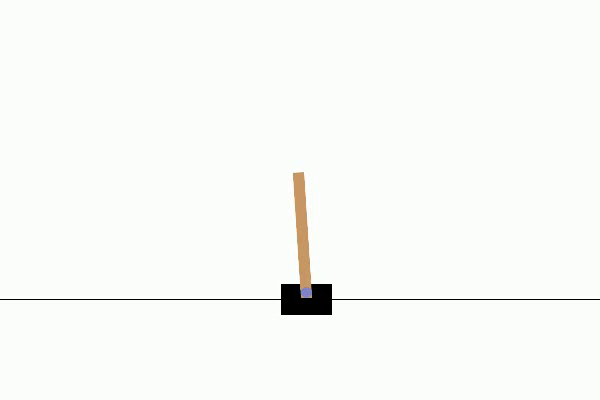

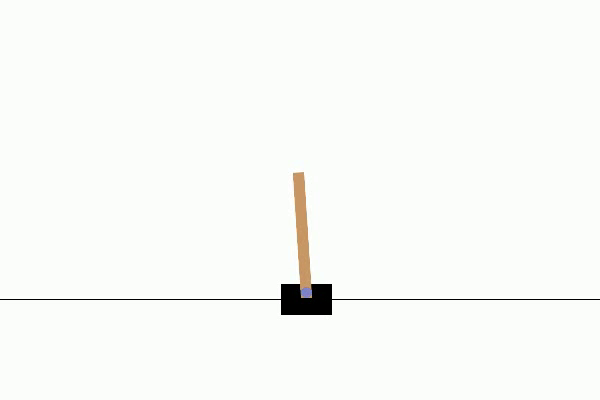

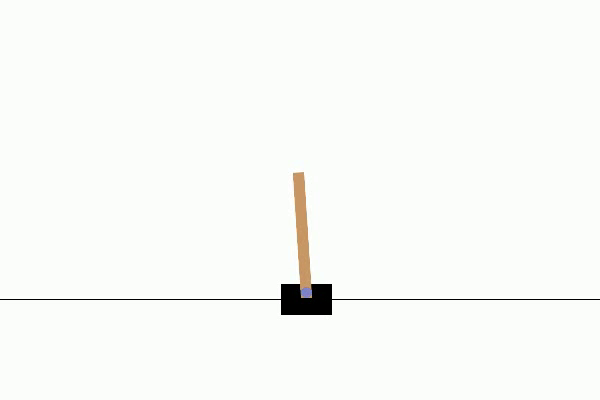

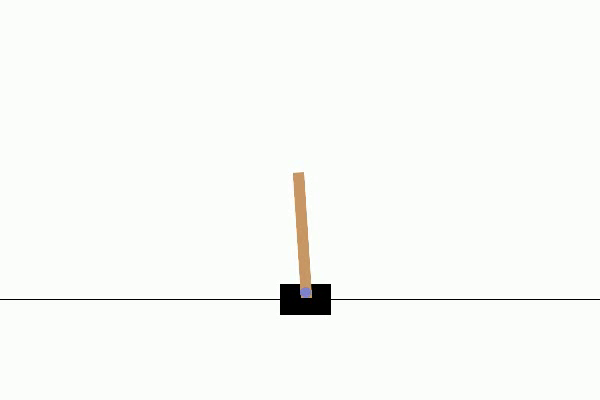

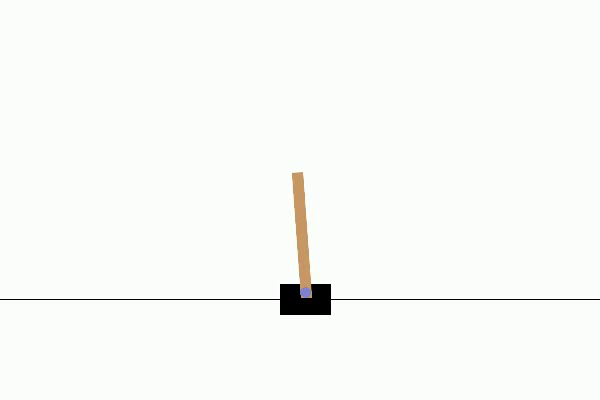

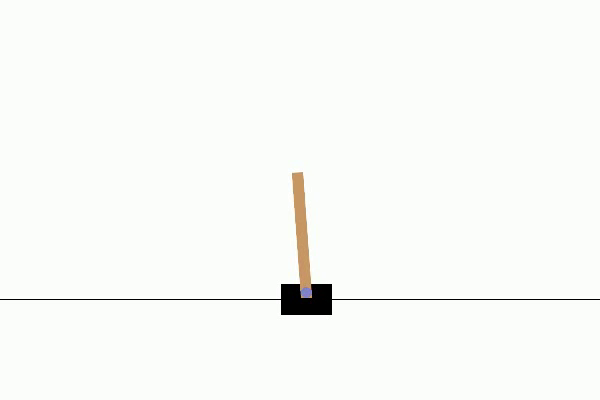

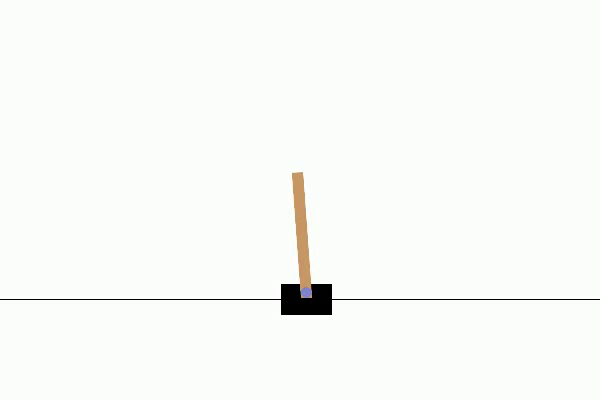

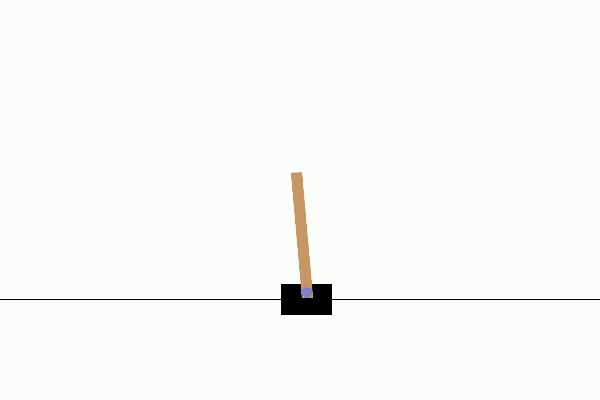

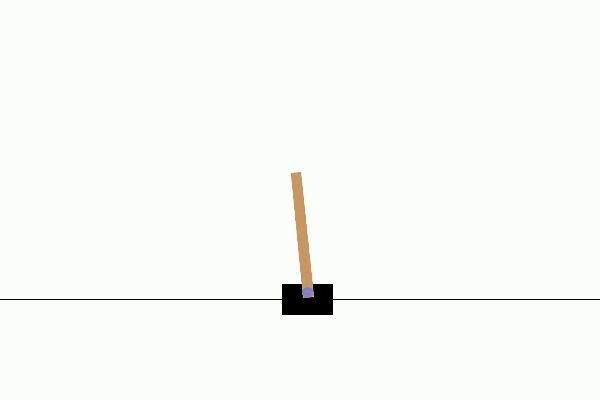

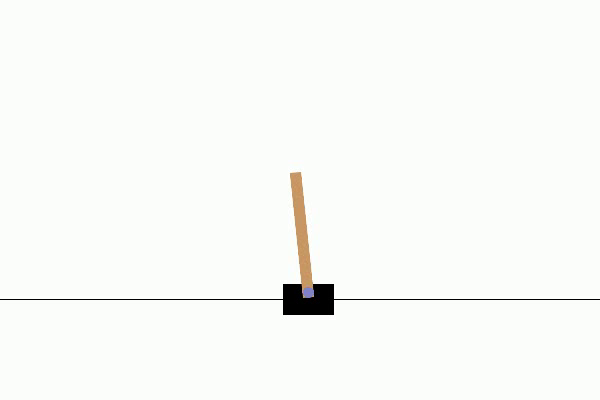

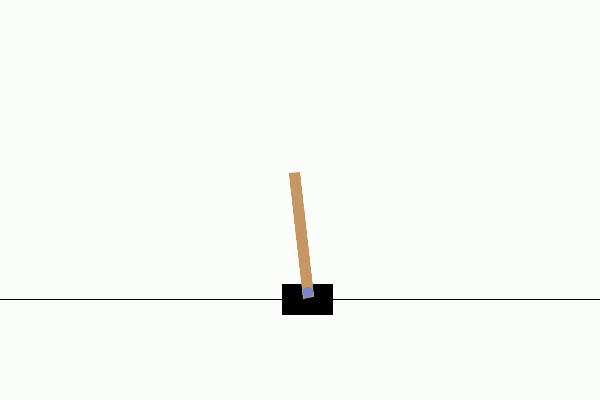

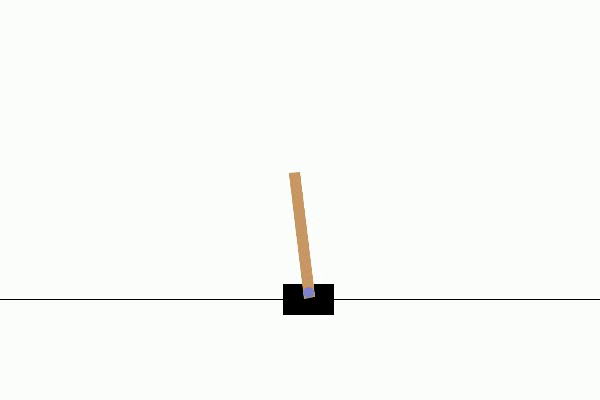

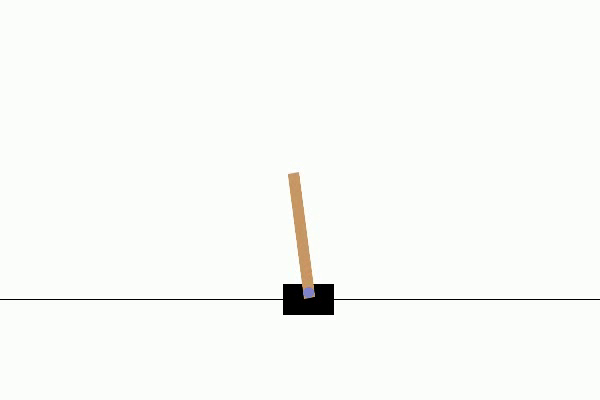

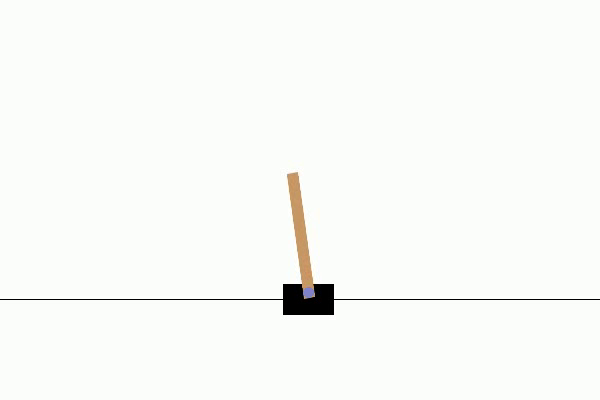

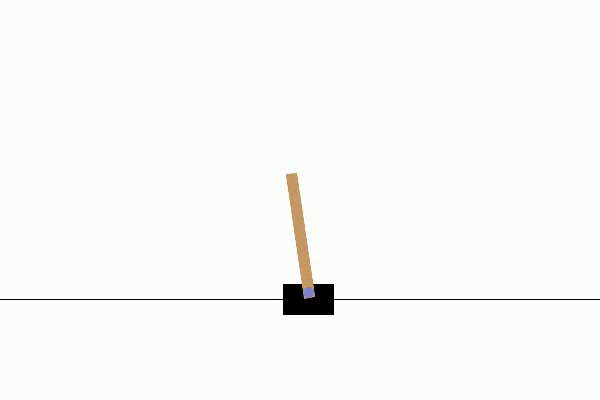

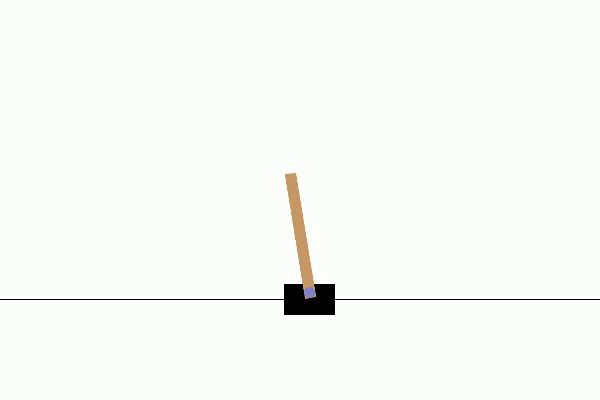

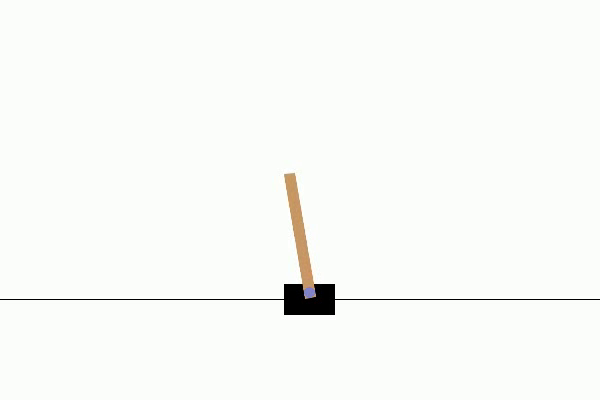

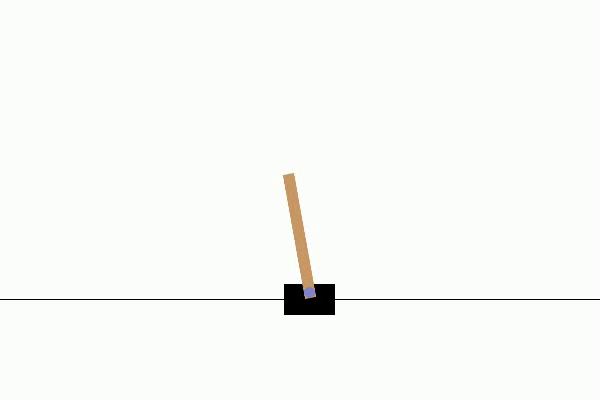

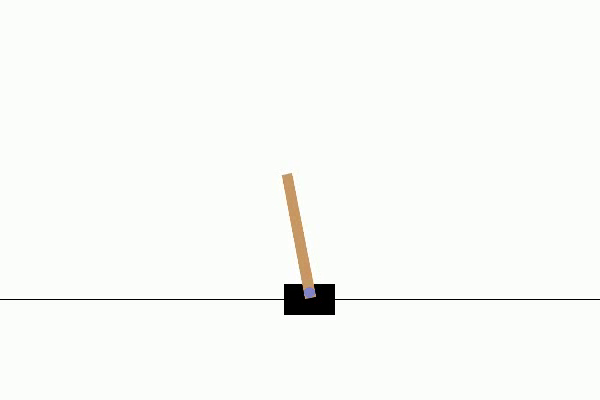

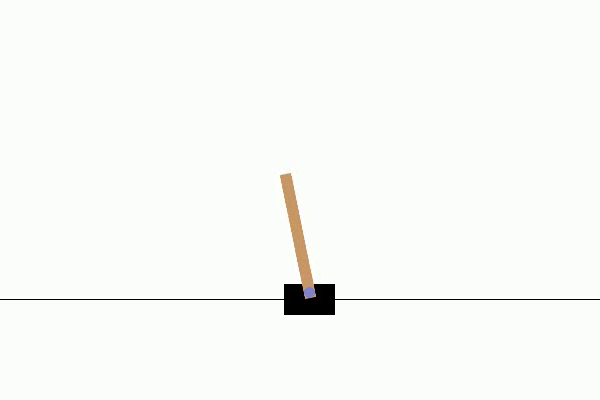

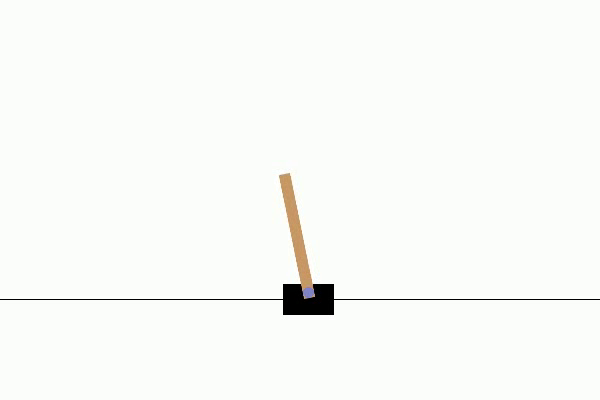

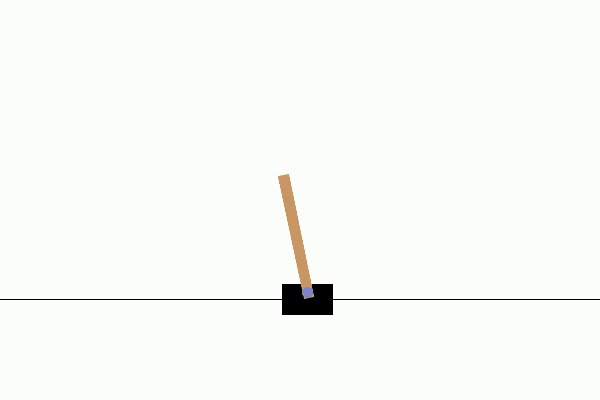

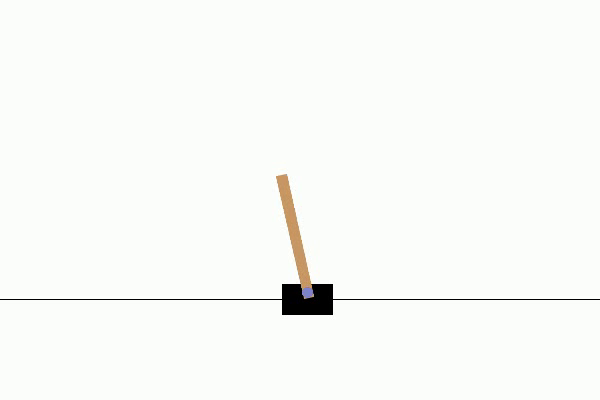

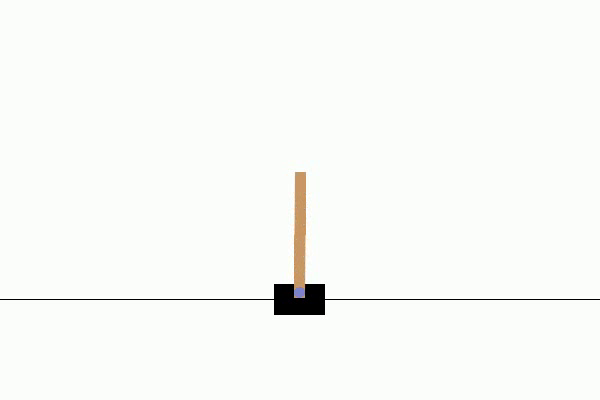

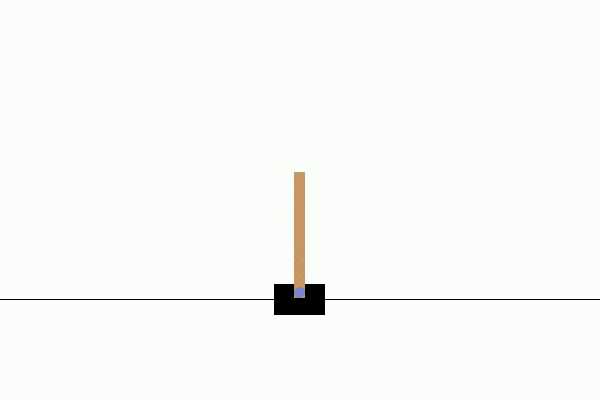

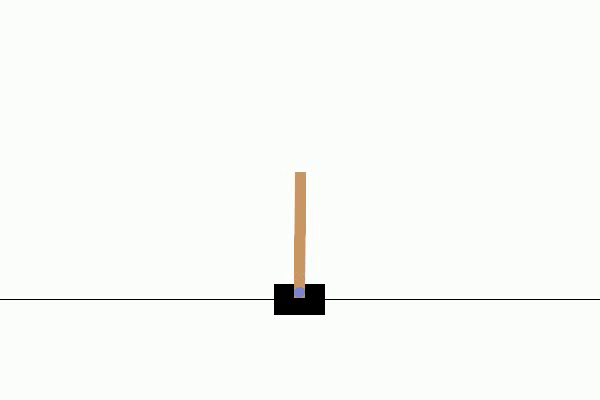

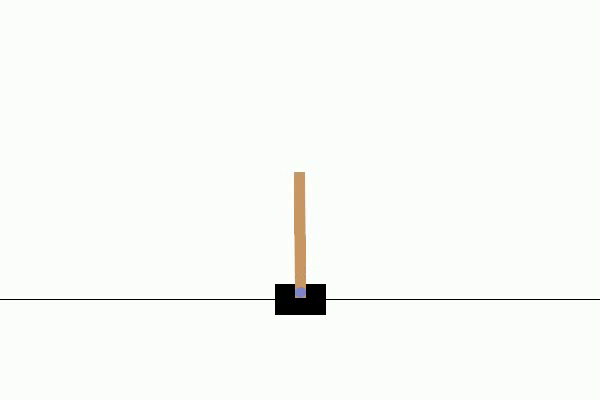

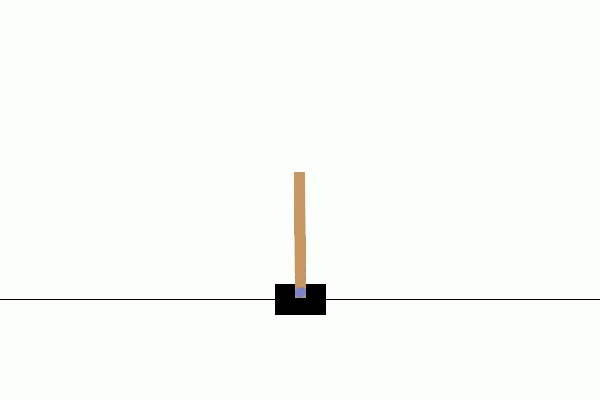

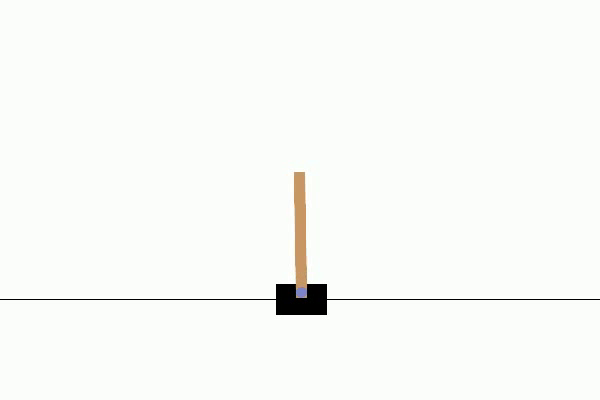

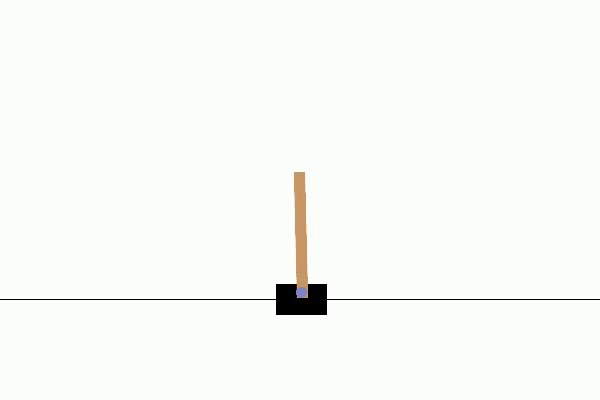

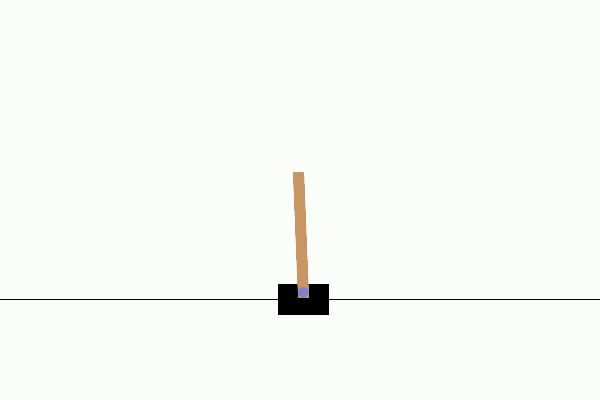

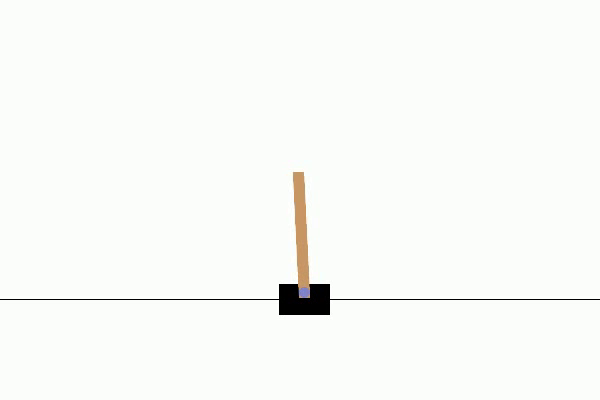

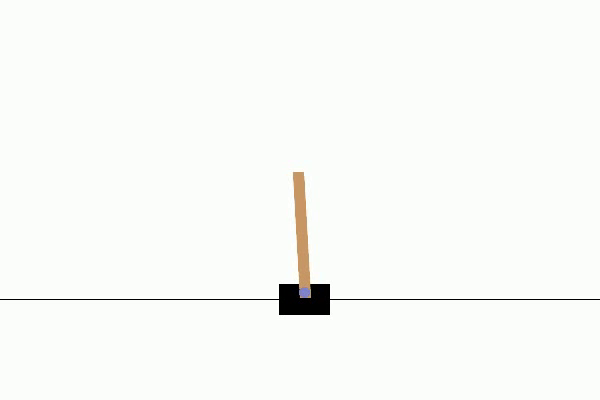

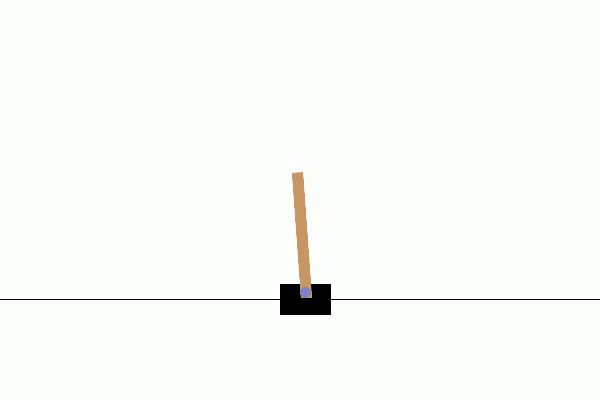

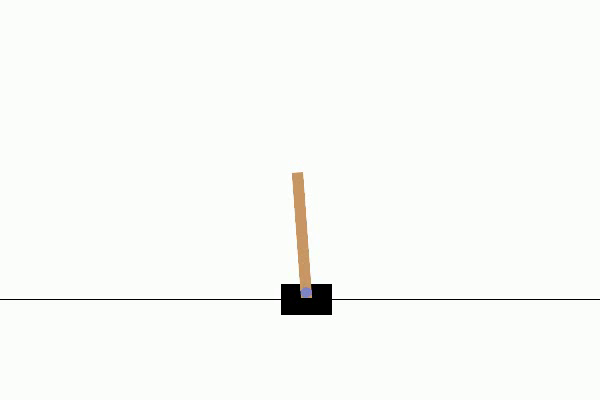

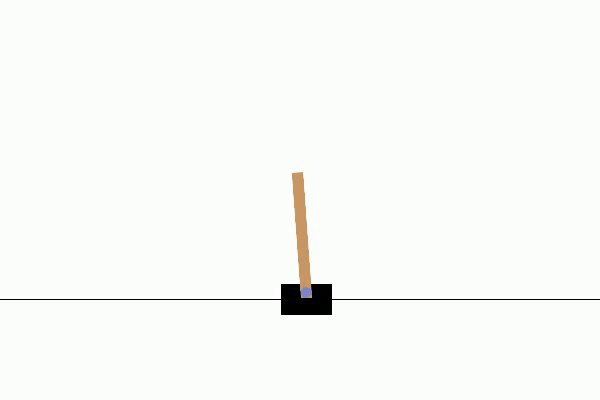

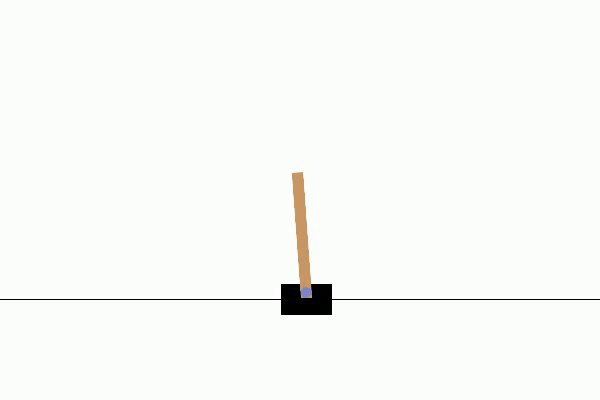

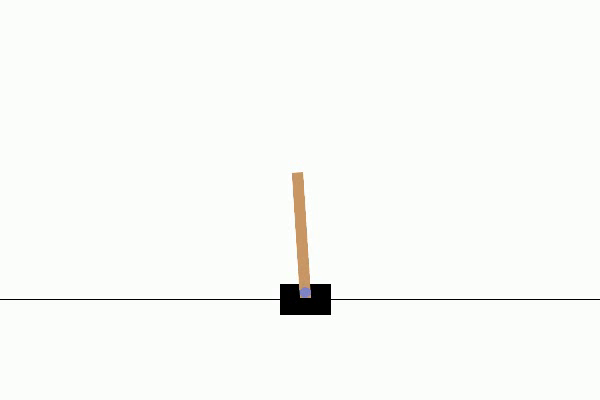

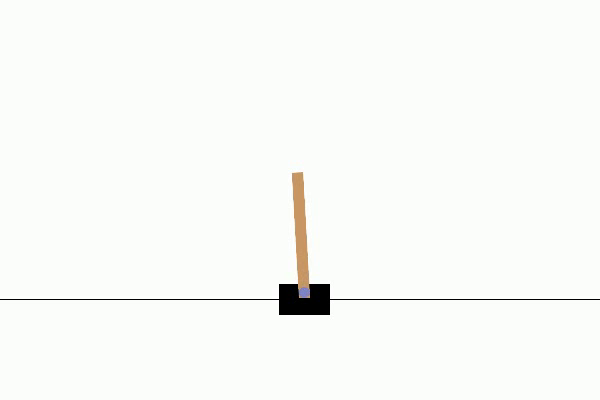

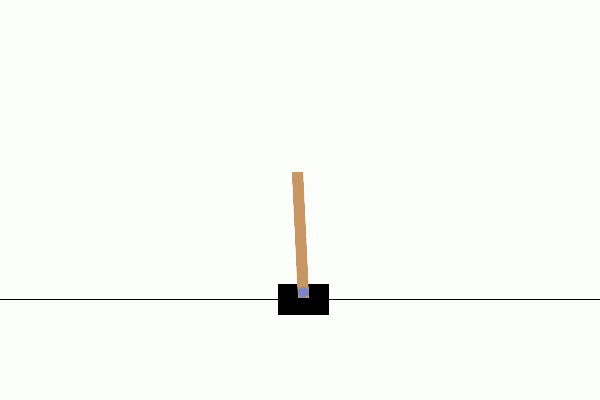

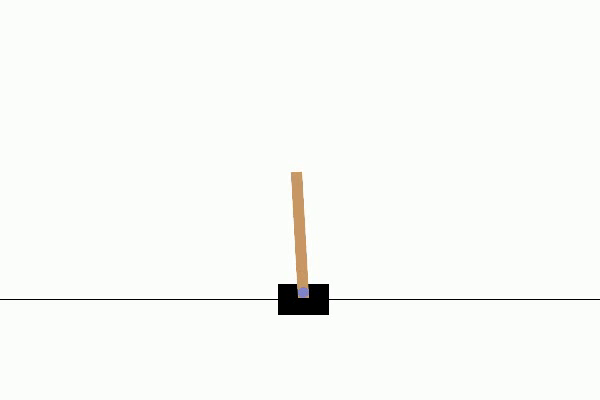

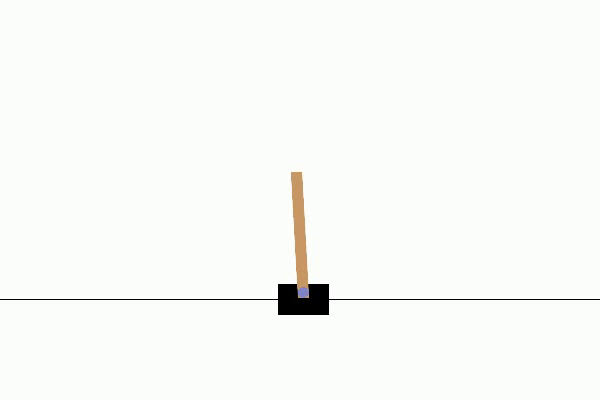

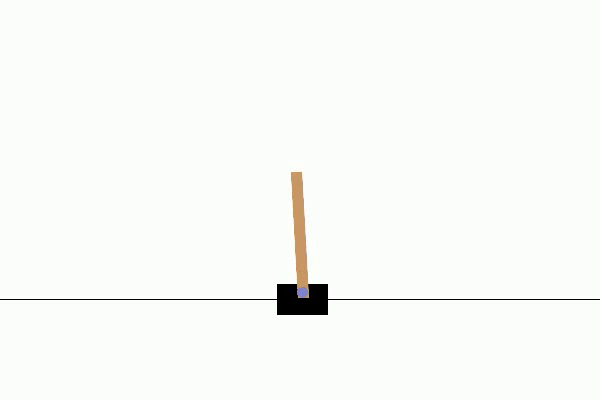

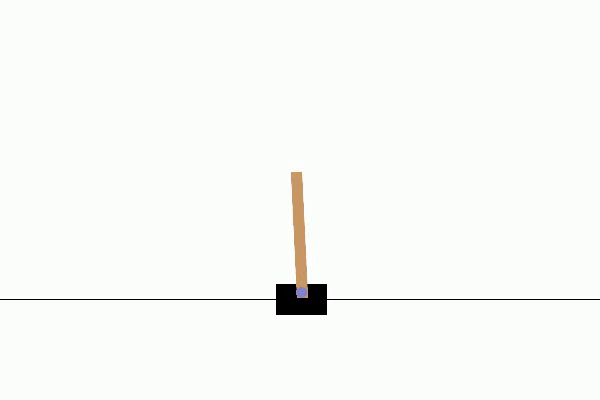

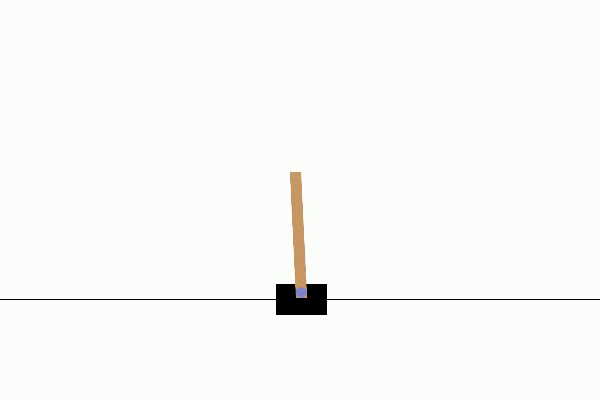

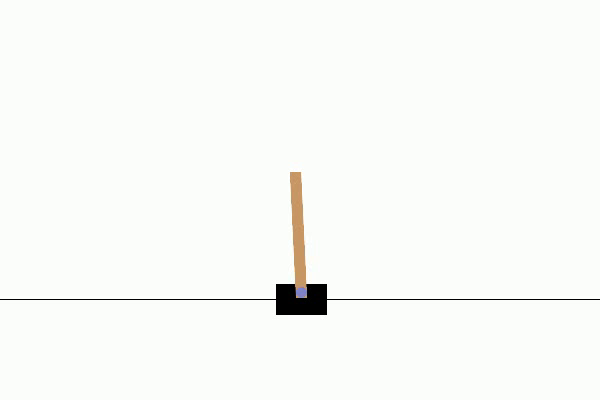

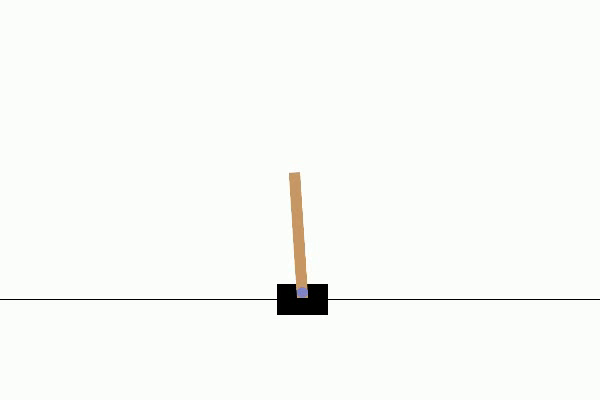

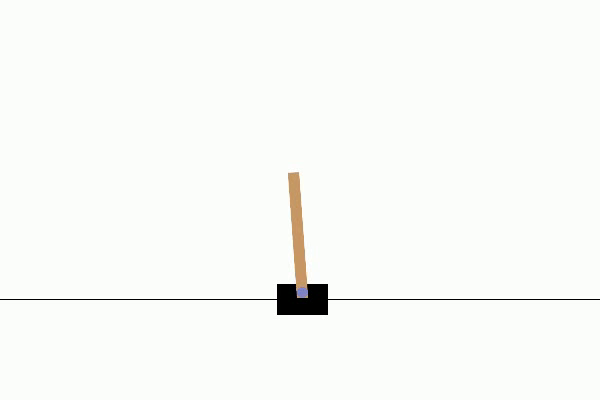

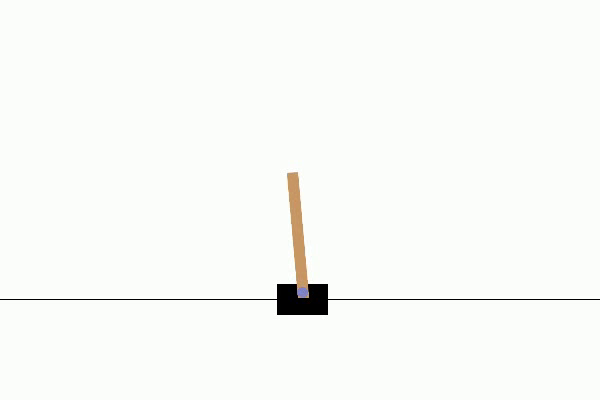

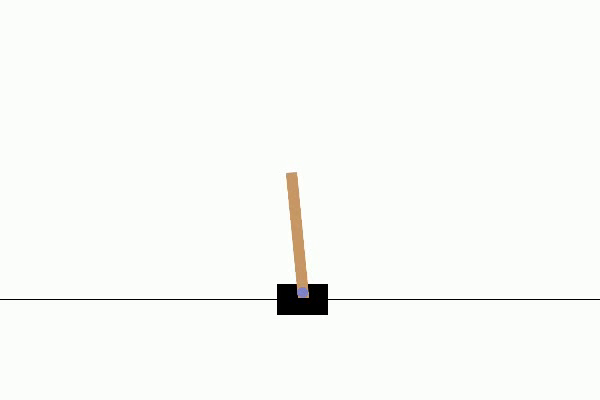

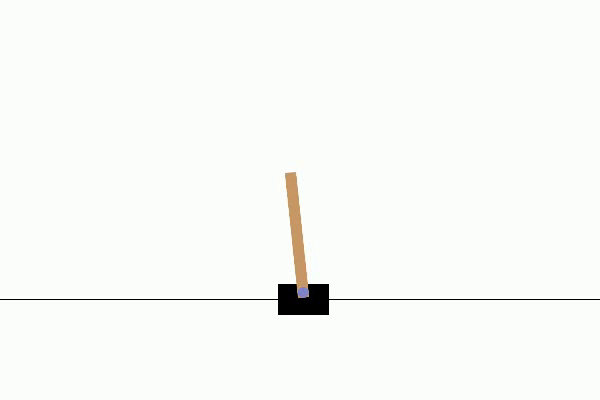

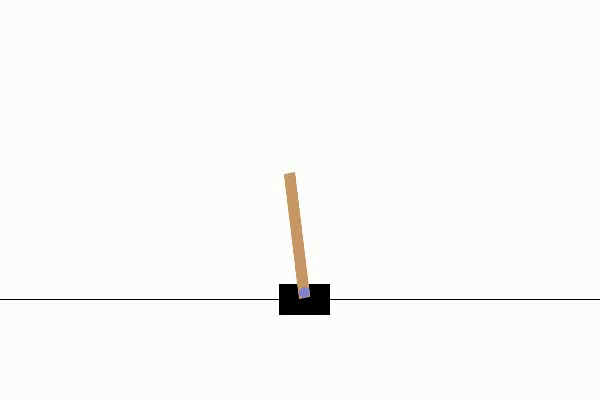

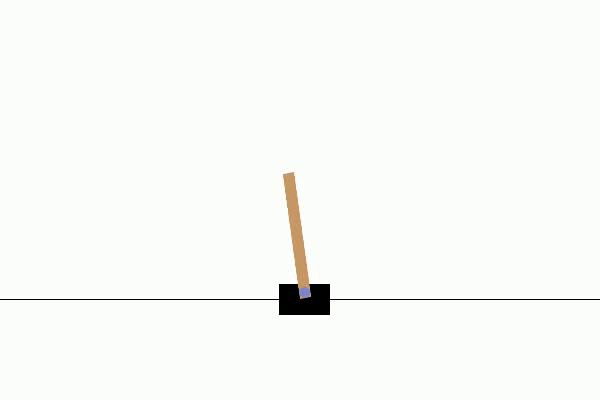

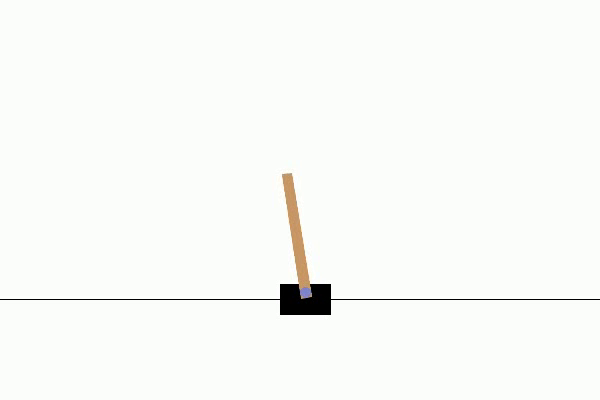

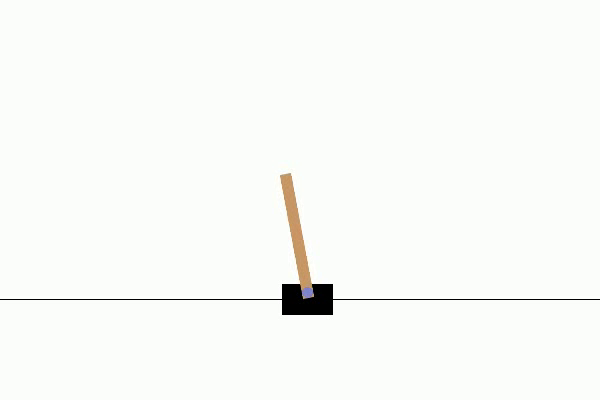

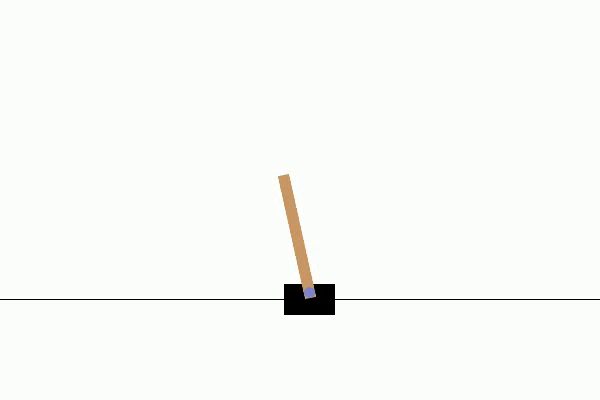

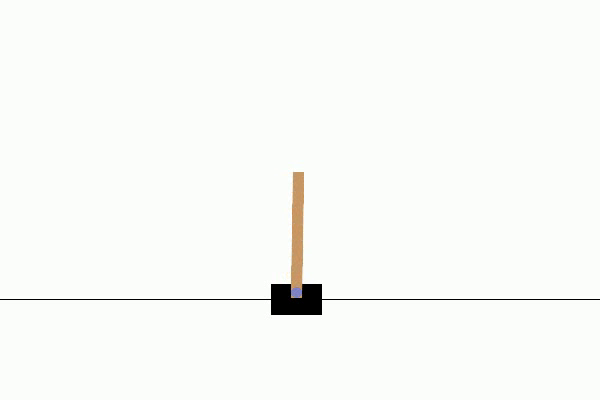

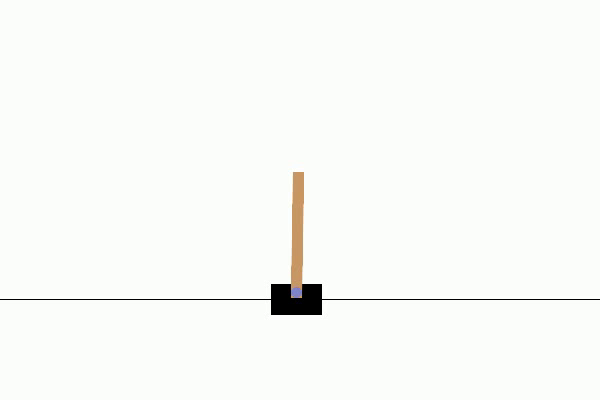

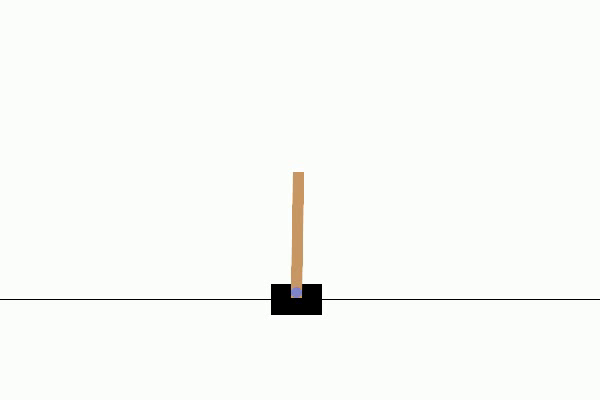

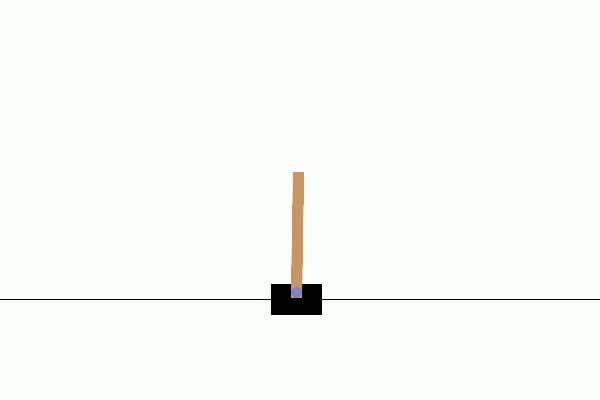

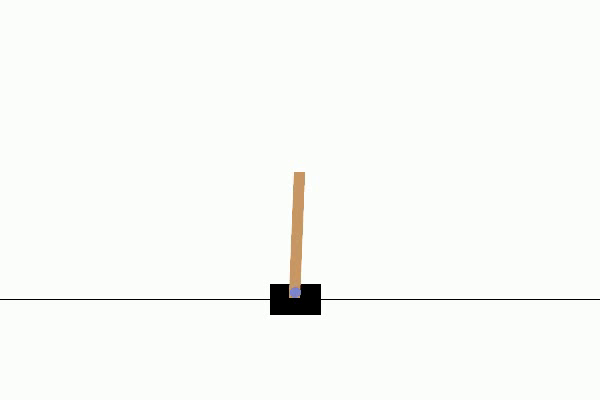

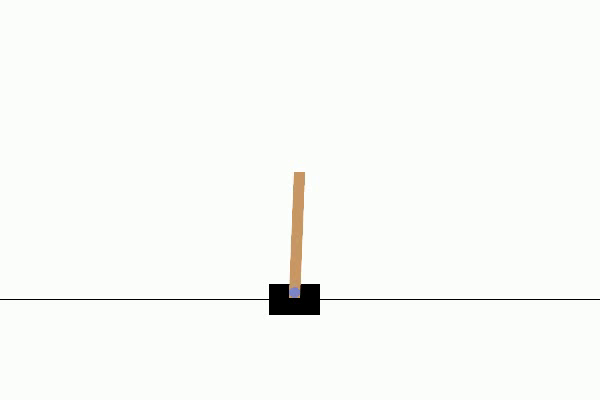

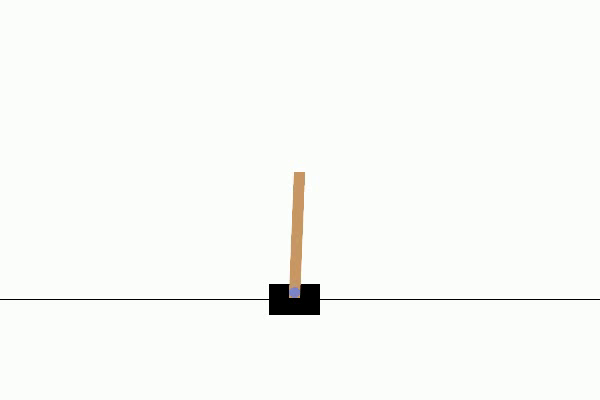

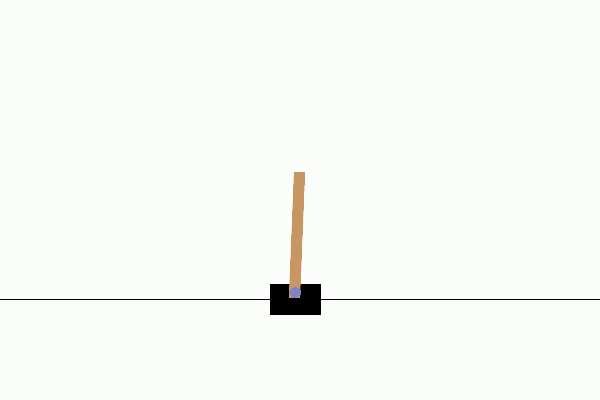

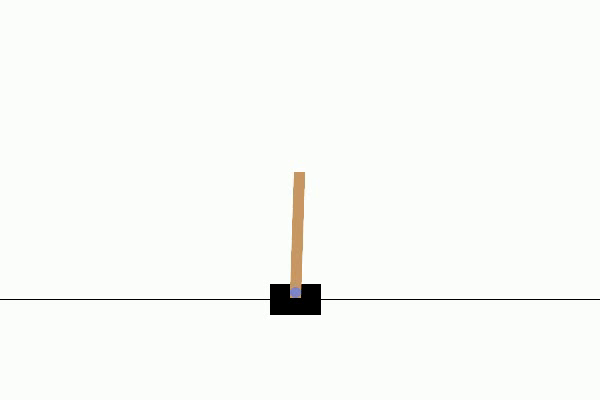

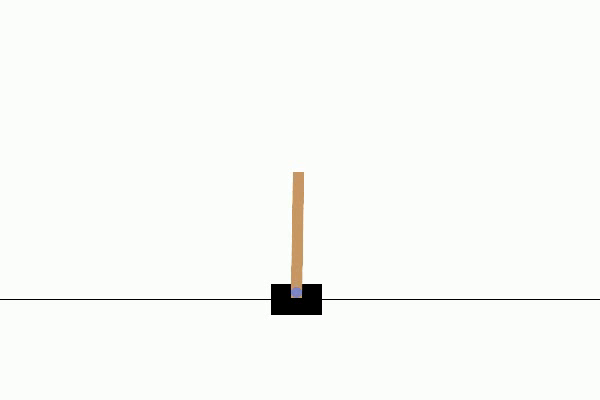

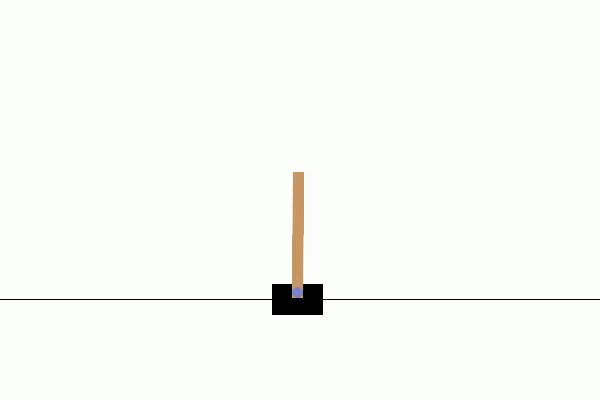

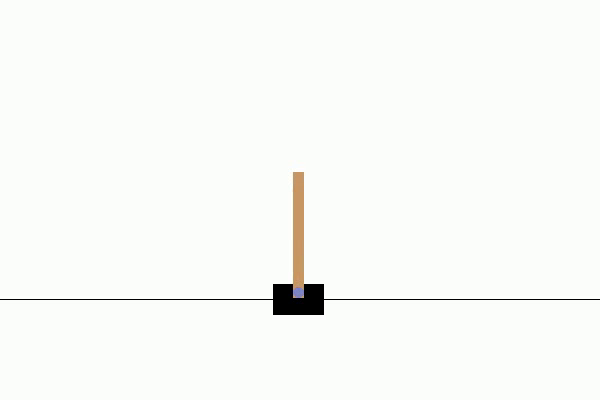

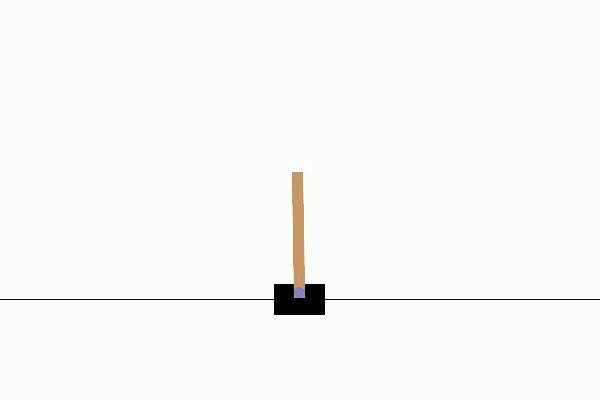

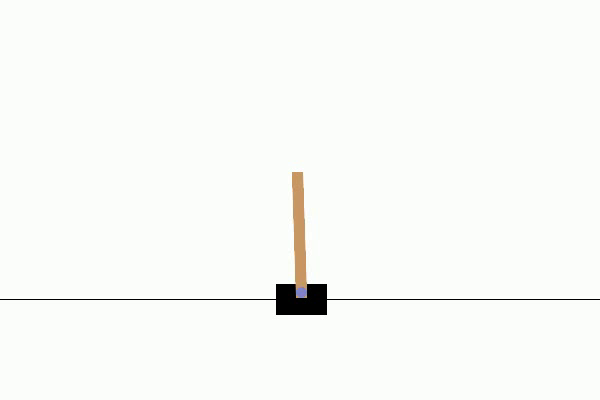

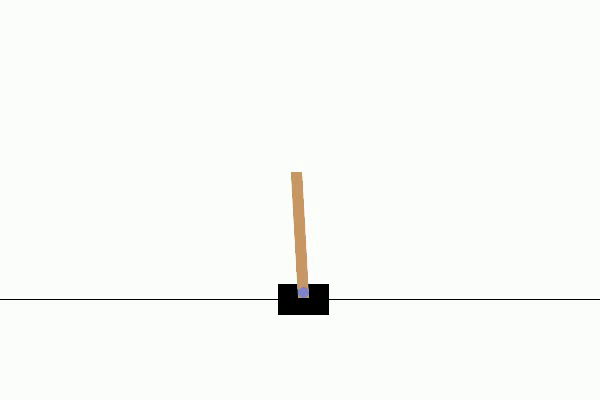

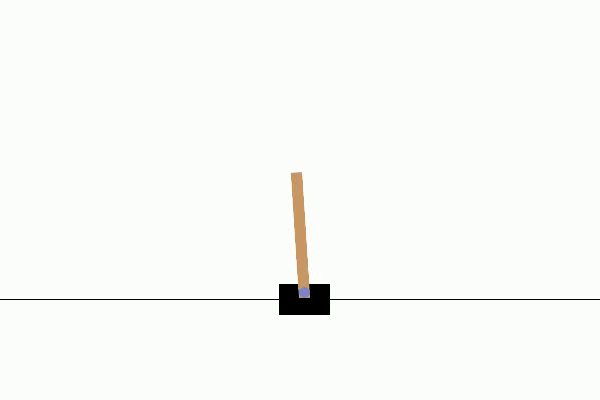

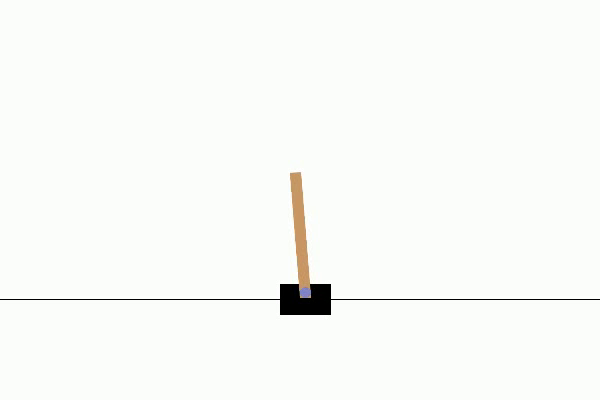

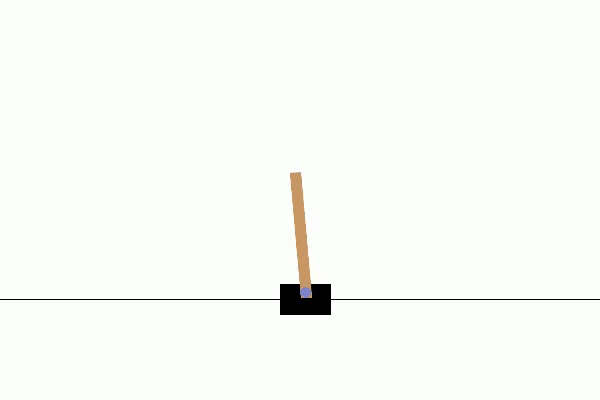

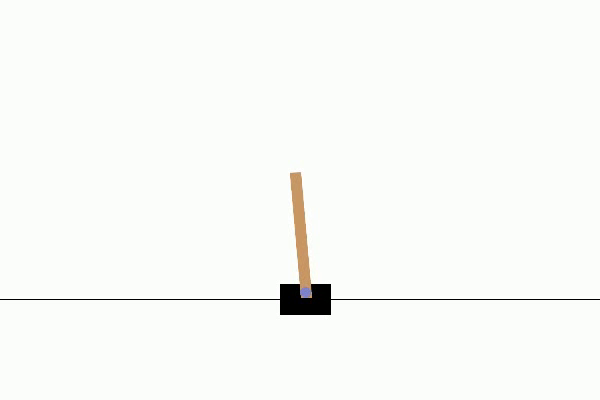

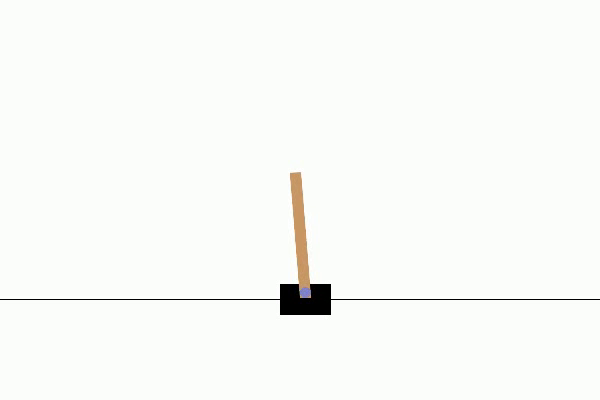

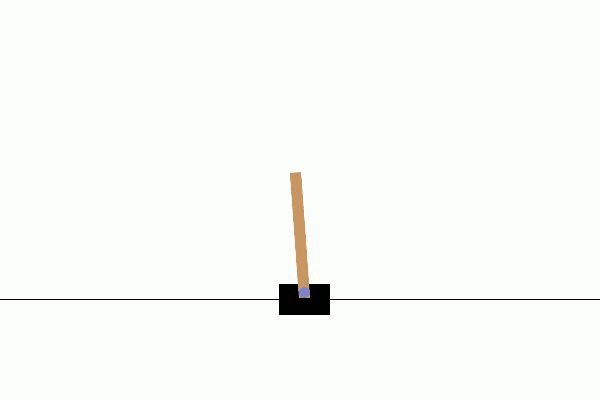

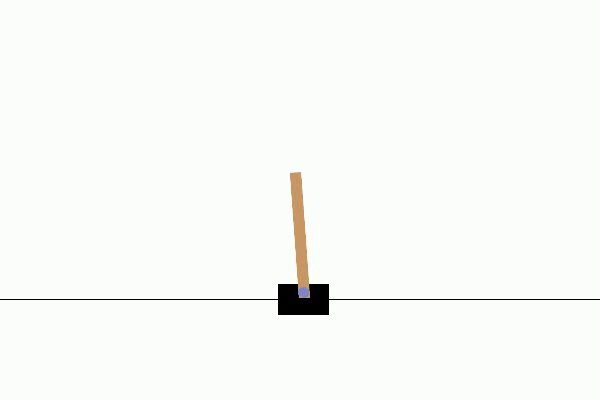

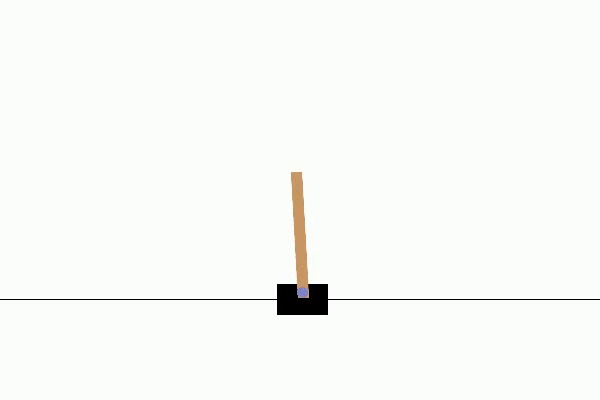

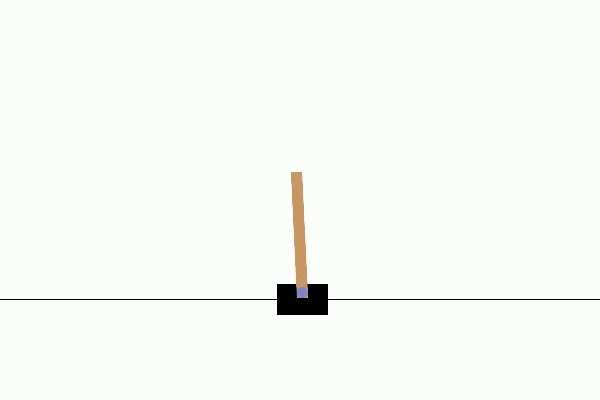

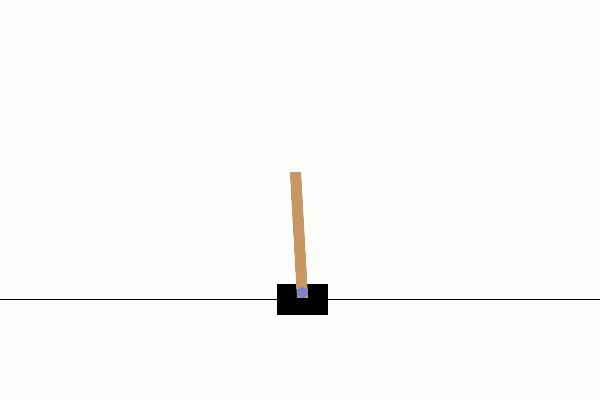

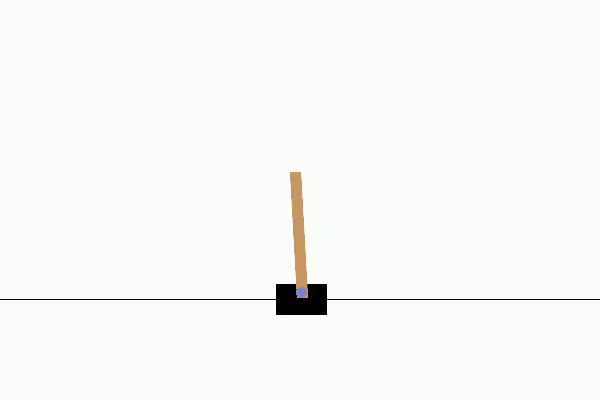

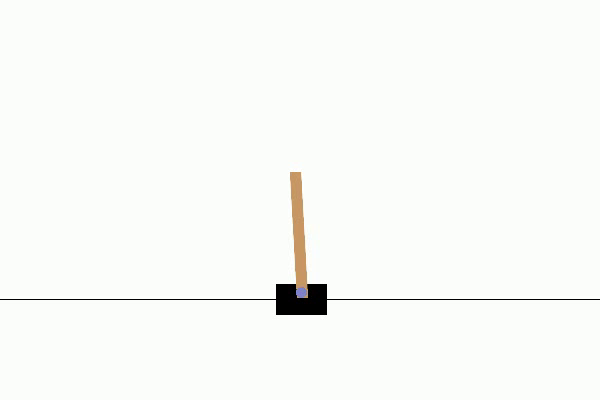

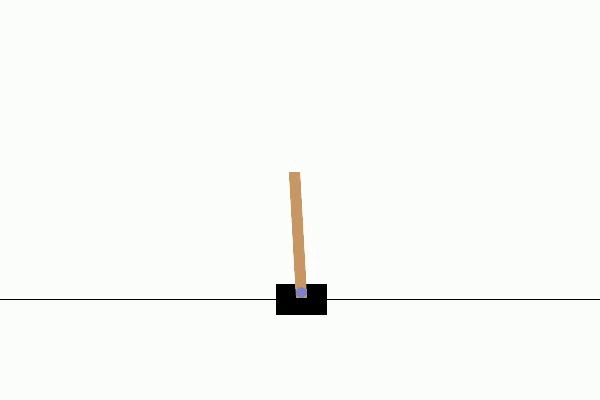

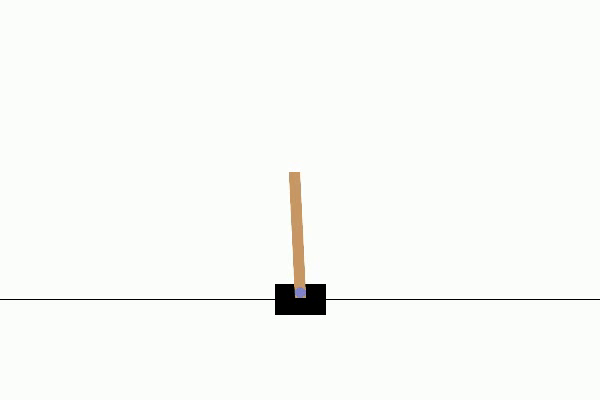

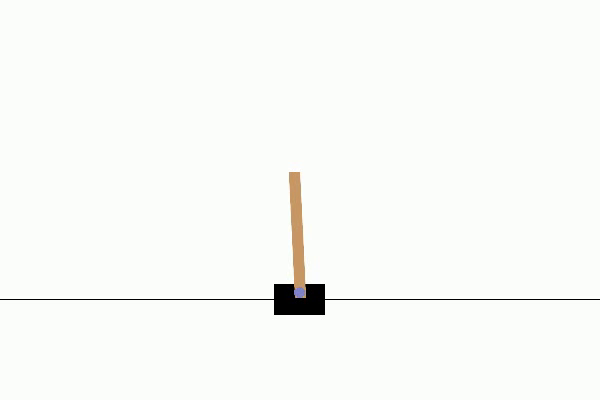

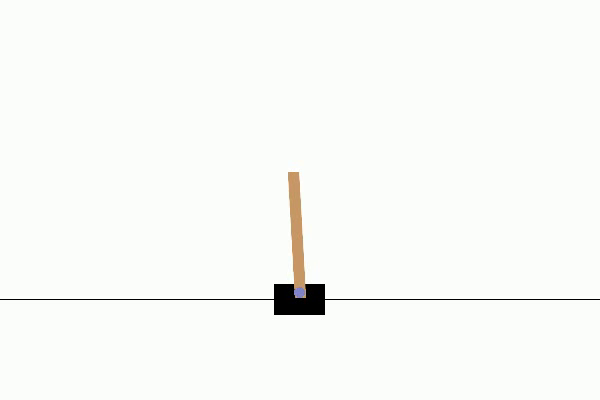

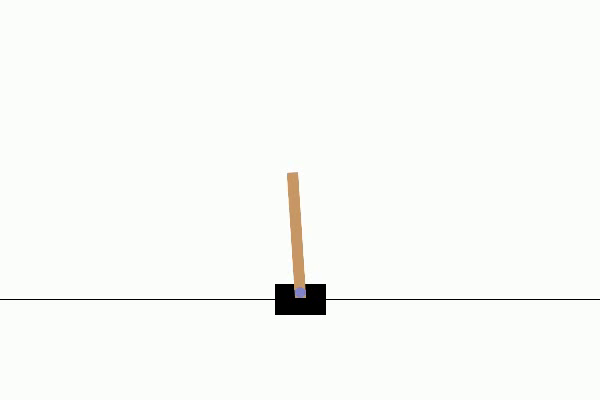

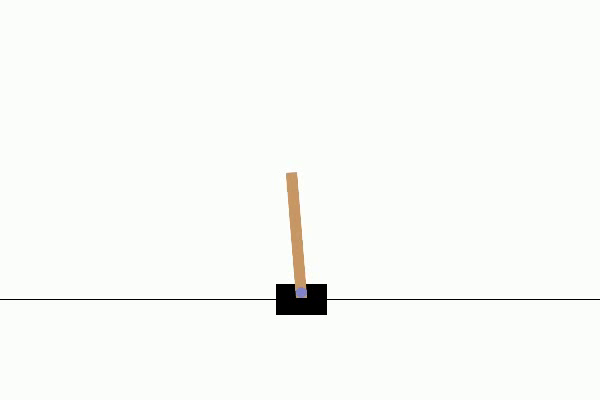

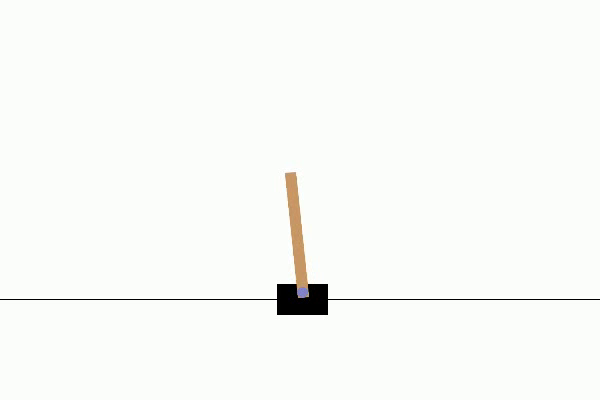

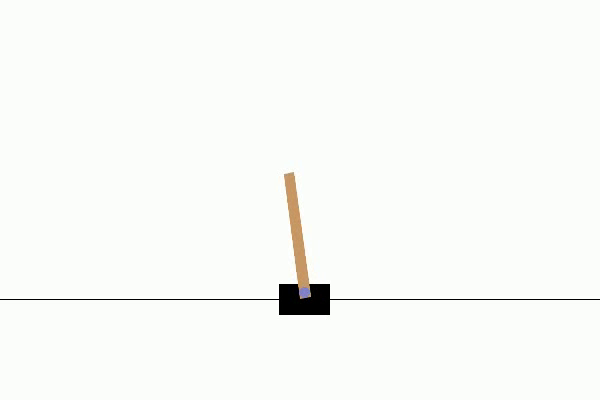

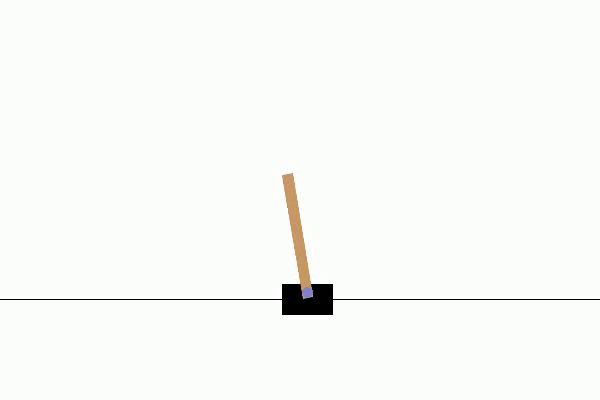

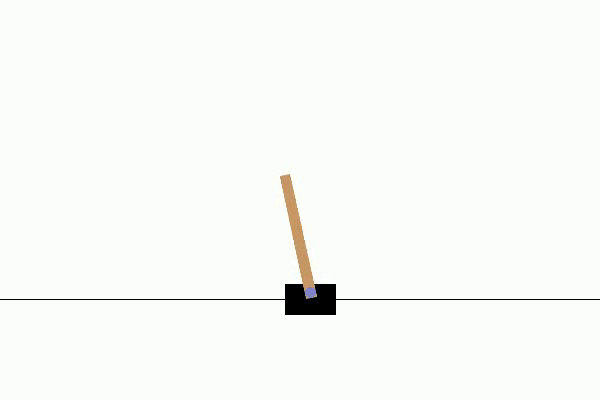

In [12]:
from google.colab.patches import cv2_imshow
import cv2

# Download sample video
!curl -o sample.mp4 https://www.sample-videos.com/video123/mp4/720/big_buck_bunny_720p_1mb.mp4

cap = cv2.VideoCapture('test_envorment.mp4')
while cap.isOpened():
    ret, image = cap.read()

    if not ret:
      break

    cv2_imshow(image) # Note cv2_imshow, not cv2.imshow

    cv2.waitKey(1) & 0xff

cv2.destroyAllWindows()
cap.release()

In [ ]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array')
env = DummyVecEnv([lambda : env])

model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log = 'training/logs')

Using cpu device


In [ ]:
model.learn(total_timesteps = 100_000)

----------------------------
| time/              |     |
|    fps             | 540 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 5   |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 178          |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 10           |
| train/                  |              |
|    approx_kl            | 8.667707e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 0.0267       |
|    learning_rate        | 0.0007       |
|    loss                 | -0.242       |
|    n_updates            | 478          |
|    policy_gradient_loss | -2.14        |
|    value_loss           | 4.69         |
------------------------------------------
-----------------------

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
|    time_elapsed         | 1007      |
|    total_timesteps      | 98615     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -6.33e-11 |
|    explained_variance   | 0.00163   |
|    learning_rate        | 0.0007    |
|    loss                 | -0.0223   |
|    n_updates            | 197688    |
|    policy_gradient_loss | -0.0226   |
|    value_loss           | 0.000626  |
---------------------------------------
---------------------------------------
| time/                   |           |
|    fps                  | 97        |
|    iterations           | 19724     |
|    time_elapsed         | 1007      |
|    total_timesteps      | 98620     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0

In [ ]:
model.save('training/saved_models/OPP_cartpole')

In [ ]:
del model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = PPO.load('training/saved_models/OPP_cartpole', env = env)

# evaluate_policy(model, env, n_eval_episodes = 10)

In [ ]:
env.close()

In [ ]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array')
env = DummyVecEnv([lambda : env])

# Define video writer
width, height = 600, 400
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_writer = cv2.VideoWriter("video.mp4", fourcc, 30.0, (width, height))


episodes = 10

for episode in range(1, episodes+1):
    observation = env.reset()
    done, score = False, 0

    while not done:
        action, _ = model.predict(observation)
        step = env.step(action)

        observation, reward, done, info = step[0], step[1], step[2], step[3]
        score += reward

        # Recording envorment
        frame = env.render()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        frame = cv2.resize(frame, (width, height))

        # Write frame to video
        video_writer.write(frame)


    print(f"Episode {episode} score: {score}")

video_writer.release()
env.close()
cv2.destroyAllWindows()

Episode 1 score: [500.]
Episode 2 score: [500.]
Episode 3 score: [500.]
Episode 4 score: [500.]
Episode 5 score: [500.]
Episode 6 score: [500.]
Episode 7 score: [500.]
Episode 8 score: [500.]
Episode 9 score: [500.]
Episode 10 score: [500.]


# Luna Lander

In [ ]:
env = gym.make('LunarLander-v2', render_mode = 'rgb_array')
env = DummyVecEnv([lambda : env])

model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log = 'training/logs')

Using cpu device


In [ ]:
model.learn(total_timesteps = 100_000)

Logging to training/logs/PPO_4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------
| time/              |      |
|    fps             | 779  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 521          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0095745325 |
|    clip_fraction        | 0.0631       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.19        |
|    explained_variance   | 5.53e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 161          |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00696     |
|    value_loss           | 299          |
------------------------------------------
----------------

In [ ]:
env = gym.make('LunarLander-v2', render_mode = 'rgb_array')
env = DummyVecEnv([lambda : env])

# Define video writer
width, height = 600, 400
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video_writer = cv2.VideoWriter("video.mp4", fourcc, 30.0, (width, height))


episodes = 10

for episode in range(1, episodes+1):
    observation = env.reset()
    done, score = False, 0

    while not done:
        action, _ = model.predict(observation)
        step = env.step(action)

        observation, reward, done, info = step[0], step[1], step[2], step[3]
        score += reward

        # Recording envorment
        frame = env.render()
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        frame = cv2.resize(frame, (width, height))

        # Write frame to video
        video_writer.write(frame)


    print(f"Episode {episode} score: {score}")

video_writer.release()
env.close()
cv2.destroyAllWindows()

Episode 1 score: [-82.538345]
Episode 2 score: [51.416725]
Episode 3 score: [108.57732]
Episode 4 score: [107.908134]
Episode 5 score: [-55.914127]
Episode 6 score: [183.19484]
Episode 7 score: [70.19695]
Episode 8 score: [-96.34069]
Episode 9 score: [-27.187027]
Episode 10 score: [81.337326]


# Luna lander